# **Kütüphanelerin Import Edilmesi**

In [1]:
# Kütüphanelerin Import Edilmesi

# Numerik hesaplamalar yapabilmek için.
import numpy as np

# Ver manipülasyonu ve analizi için.
import pandas as pd

# Veri setleri ve grafik çizdirmek için.
import seaborn as sns

# Grafik çizdirmek için.
import matplotlib.pyplot as plt

# Eksik değerler için kütüphanenin önce indirilip sonra import edilmesi.
#!pip install missingno
import missingno as msno

# Çok değişkenli aykırı değerleri yakalamak için kütüphanenin import edilmesi.
from sklearn.neighbors import LocalOutlierFactor

# Ölçeklendirme ve Encode işlemleri için kütüphanelerin import edilmesi.
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler

# Holdout Yöntemi ve Model Çapraz Doğrulama için kütüphanelerin import etilmesi.
from sklearn.model_selection import train_test_split, cross_validate


# Sınıflandırma algoritmaları için kütüphanelerin import edilmesi.

# Lojistik Regresyon algoritması için kütüphanenin import edilmesi
from sklearn.linear_model import LogisticRegression

# KNN algortiması için kütüphanin import edilmesi.
from sklearn.neighbors import KNeighborsClassifier

# Random Forest algortması kütüphnesinin import edilmesi.
from sklearn.ensemble import RandomForestClassifier

# Destek Vektör Makinesi algoritması kütüphanesinin import edilmesi.
from sklearn.svm import SVC

# Decision Tree Classifier Algoritması kütüphanesinin import edilmesi.
from sklearn.tree import DecisionTreeClassifier

# GBM Alogritması kütüphanesinin import edilmesi.
from sklearn.ensemble import GradientBoostingClassifier

# LightGBM Algoritması kütüphanesinin import edilmesi.
from lightgbm import LGBMClassifier
import lightgbm as lgb

# XGBoost Algoritması kütüphanesinin import edilmesi.
from xgboost import XGBClassifier

# Model sonuç değerlendirme için kütüphanenin import edilmesi.

# Classification Problemleri İçin.
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix, classification_report, plot_roc_curve


# Çıktı Görüntüleri İçin
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
pd.set_option("display.float_format", lambda x: "%3.f" % x)
pd.options.display.float_format = '{:,.3f}'.format
pd.set_option("display.width", 5000)

# **İş Problemi**

Özellikleri belirtildiğinde kişilerin diyabet hastası olup olmadıklarını tahmin
edebilecek bir makine öğrenmesi modeli geliştirilmesi istenmektedir. Modeli
geliştirmeden önce gerekli olan veri analizi ve özellik mühendisliği adımlarını
gerçekleştirmeniz beklenmektedir.

# **Veri Seti Hikayesi**

Veri seti ABD'deki Ulusal Diyabet-Sindirim-Böbrek Hastalıkları Enstitüleri'nde tutulan büyük veri setinin parçasıdır. ABD'deki
Arizona Eyaleti'nin en büyük 5. şehri olan Phoenix şehrinde yaşayan 21 yaş ve üzerinde olan Pima Indian kadınları üzerinde
yapılan diyabet araştırması için kullanılan verilerdir.
Hedef değişken "outcome" olarak belirtilmiş olup; 1 diyabet test sonucunun pozitif oluşunu, 0 ise negatif oluşunu belirtmektedir.

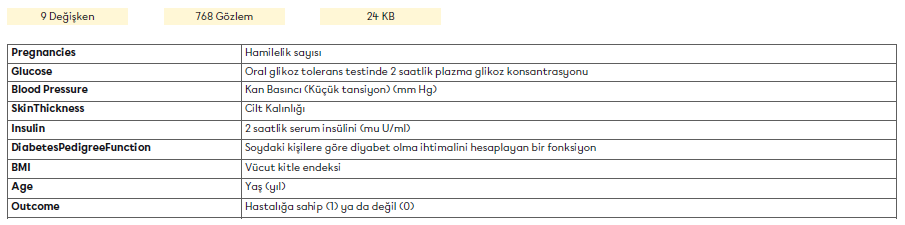

# **Proje Görevleri**

## **Görev 1: Keşifçi Veri Analizi**

### **Adım 1:**

Genel resmi inceleyiniz.

Öncelikle veri setimizi yükleyelim.

In [2]:
data = pd.read_csv("/content/drive/MyDrive/Sıfırdan Başlayanlar İçin Veri Bilimi - miuul/Veri Setleri/diabetes.csv")

In [3]:
df = data.copy()

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.600,0.627,50,1
1,1,85,66,29,0,26.600,0.351,31,0
2,8,183,64,0,0,23.300,0.672,32,1
3,1,89,66,23,94,28.100,0.167,21,0
4,0,137,40,35,168,43.100,2.288,33,1


Proje süresince rahat çalışabilmemiz için değişken isimlerini projeye başlamadan önce tek bir yazı boyutuna getirelim.

In [5]:
df.columns = [col.upper() for col in df.columns]

In [6]:
df.head()

,PREGNANCIES,GLUCOSE,BLOODPRESSURE,SKINTHICKNESS,INSULIN,BMI,DIABETESPEDIGREEFUNCTION,AGE,OUTCOME
0,6,148,72,35,0,33.600,0.627,50,1
1,1,85,66,29,0,26.600,0.351,31,0
2,8,183,64,0,0,23.300,0.672,32,1
3,1,89,66,23,94,28.100,0.167,21,0
4,0,137,40,35,168,43.100,2.288,33,1


Diabet veri setinin hikayesine bakalım:

* Veri seti ABD'deki Ulusal Diyabet-Sindirim-Böbrek Hastalıkları Enstitüleri'nde tutulan büyük veri setinin parçasıdır. 
* ABD'deki Arizona Eyaleti'nin en büyük 5. şehri olan Phoenix şehrinde yaşayan 21 yaş ve üzerinde olan Pima Indian kadınları üzerinde
yapılan diyabet araştırması için kullanılan verilerdir.
* Hedef değişken "outcome" olarak belirtilmiş olup; 1 diyabet test sonucunun pozitif oluşunu, 0 ise negatif oluşunu belirtmektedir.
* 9 değişken ve  768 gözlemden oluşmaktadır.

**Değişkenler:**
* Pregnancies: Hamilelik sayısı.
* Glucose: Oral glikoz tolerans testinde 2 saatlik plazma glikoz konsantrasyonu.
* Blood Pressure: Kan basıncı (Küçük tansiyon) (mm Hg).
* SkinThickness: Cilt kalınlığı değeri.
* Insulin: 2 saatlik serum insülini (mu U/ml).
* DiabetesPedigreeFunction: Soydaki kişilere göre diyabet olma ihtimalini hesaplayan bir fonksiyon.
* BMI: Vücut kitle endeksi.
* Age Yaş (yıl).
* Outcome Hastalığa sahip (1) ya da değil (0).

Veri setlerini genel hatlarıyla incelemeye çalışalım.

İlk beş gözleme bakalım.

In [7]:
df.head()

,PREGNANCIES,GLUCOSE,BLOODPRESSURE,SKINTHICKNESS,INSULIN,BMI,DIABETESPEDIGREEFUNCTION,AGE,OUTCOME
0,6,148,72,35,0,33.600,0.627,50,1
1,1,85,66,29,0,26.600,0.351,31,0
2,8,183,64,0,0,23.300,0.672,32,1
3,1,89,66,23,94,28.100,0.167,21,0
4,0,137,40,35,168,43.100,2.288,33,1


Son beş gözleme bakalım.

In [8]:
df.head()

,PREGNANCIES,GLUCOSE,BLOODPRESSURE,SKINTHICKNESS,INSULIN,BMI,DIABETESPEDIGREEFUNCTION,AGE,OUTCOME
0,6,148,72,35,0,33.600,0.627,50,1
1,1,85,66,29,0,26.600,0.351,31,0
2,8,183,64,0,0,23.300,0.672,32,1
3,1,89,66,23,94,28.100,0.167,21,0
4,0,137,40,35,168,43.100,2.288,33,1


Veri setimizde kaç gözlem ve kaç deişken olduğuna bakalım.

In [9]:
df.shape

(768, 9)

Değişkenler hakkında bilgi almak istersek.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   PREGNANCIES               768 non-null    int64  
 1   GLUCOSE                   768 non-null    int64  
 2   BLOODPRESSURE             768 non-null    int64  
 3   SKINTHICKNESS             768 non-null    int64  
 4   INSULIN                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DIABETESPEDIGREEFUNCTION  768 non-null    float64
 7   AGE                       768 non-null    int64  
 8   OUTCOME                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


* Veri setimiz pandas kütüphanesi içinde yer alan DataFrame formatında okunmultur.
* Veri setinde 768 tane gözlem ve 9 değişken bulunmakta.
* Veri setinde hiç eksik değer yokmuş gibi gözüküyor. (Bu durum ayrıntılı olarak incelenecek.)
* Veri setindeki değişkenlerin tamamı nümerik veri tipinde.
* Yani kategorik değişkenimiz yok gibi. (OUTCOME değişkeni hariç.)
* Sayısal değişken olarak 2 tane float (ondalıklı) veri tipinde 7 tane de int (tam sayı) veri tipinde değişkenler bulunmakta.
* Bu veri seti hafıza da 54.1 KB yer kaplamakta.

Değişkenlerimizin isimlerine erişmek istersek.

In [11]:
df.columns

Index(['PREGNANCIES', 'GLUCOSE', 'BLOODPRESSURE', 'SKINTHICKNESS', 'INSULIN', 'BMI', 'DIABETESPEDIGREEFUNCTION', 'AGE', 'OUTCOME'], dtype='object')

İndex bilgisine erişmek istersek.

In [12]:
df.index

RangeIndex(start=0, stop=768, step=1)

Sayısal değişkenlerin betimsel istatistiklerine erişelim.

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PREGNANCIES,768.000,3.845,3.370,0.000,1.000,3.000,6.000,17.000
GLUCOSE,768.000,120.895,31.973,0.000,99.000,117.000,140.250,199.000
BLOODPRESSURE,768.000,69.105,19.356,0.000,62.000,72.000,80.000,122.000
SKINTHICKNESS,768.000,20.536,15.952,0.000,0.000,23.000,32.000,99.000
INSULIN,768.000,79.799,115.244,0.000,0.000,30.500,127.250,846.000
BMI,768.000,31.993,7.884,0.000,27.300,32.000,36.600,67.100
DIABETESPEDIGREEFUNCTION,768.000,0.472,0.331,0.078,0.244,0.372,0.626,2.420
AGE,768.000,33.241,11.760,21.000,24.000,29.000,41.000,81.000
OUTCOME,768.000,0.349,0.477,0.000,0.000,0.000,1.000,1.000


* Describe metodu ile tüm sayısal değişkenlerin içindeki gözlem değerlerini, ortolamalarını, standart sapmalarını, min. değerini ilk %25'lik %50'lik ve %75'likinci değerlerini ve son olarak da o değişkenin içindeki max değeri görebiliyoruz.
* PREGNANCIES, GLUCOSE, BLOODPRESSURE, SKINTHICKNESS, INSULIN, BMI değişkenlerinin min değerleri sıfır olduğu görülmektedir.
* PREGNANCIES (hamilelik sayısı) değişkeni hariç diğer değişkenlerin min. değeri 0 olamaz.
* Veri setini hazırlayanlar tarafından eksik değerler yerine 0 ile doldurulmuş.

Veri setinde eksik değer var mı yok mu sorusunu soralım.
* True ya da False şeklinde bize çıktı verecektir.
* True: Evet veri setinde en az bir tane eksik değer var,
* False: Veri setinde hiç eksik değer yok.

In [14]:
df.isnull().values.any()

False

* Eksik değer yokmuş gibi duruyor fakat GLUCOSE, BLOODPRESSURE, SKINTHICKNESS, INSULIN, BMI değişkenlerdeki eksik değerleri sıfır ile doldurulmuş olabileceğini göz önünde bulundurmamız gerekiyor.
* Her bir değişkende toplam eksik değerleri görmek istersek.

In [15]:
df.isnull().sum()

PREGNANCIES                 0
GLUCOSE                     0
BLOODPRESSURE               0
SKINTHICKNESS               0
INSULIN                     0
BMI                         0
DIABETESPEDIGREEFUNCTION    0
AGE                         0
OUTCOME                     0
dtype: int64

* Tüm değişkenlerde eksik değer yokmuş gibi duruyor yine.

### **Adım 2:**

Numerik ve kategorik değişkenleri yakalayınız.

In [16]:
def grab_col_names(dataframe, cat_th = 10, car_th = 20):
  """
    Veri setindeki kategorik, numerik ve kategorik fakat kardinal değişkenlerin isimlerini verir.
    Not: Kategorik değişkenlerin içerisinde numerik görünümlü kategorik değişkenler de dahildir.

    Parameters
    ----------
    dataframe: dataframe
        değişken isimleri alınmak istenen dataframe'dir.
    cat_th: int, float
        numerik fakat kategorik olan değişkenler için sınıf eşik değeri
    car_th: int, float
        kategorik fakat kardinal değişkenler için sınıf eşik değeri

    Returns
    -------
    cat_cols: list
        Kategorik değişken listesi
    num_cols: list
        Numerik değişken listesi
    cat_but_car: list
        Kategorik görünümlü kardinal değişken listesi

    Notes
    ------
    cat_cols + num_cols + cat_but_car = toplam değişken sayısı
    num_but_cat cat_cols'un içerisinde.
  """
  # Kategorik Değişkenler: cat_cols & num_but_car
  cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
  num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and dataframe[col].dtypes != "O"] 
  cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and dataframe[col].dtypes == "O"]
  cat_cols += num_but_cat
  cat_cols = [col for col in cat_cols if col not in cat_but_car]

  # Numerik Değişkenler: num_cols
  num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
  num_cols = [col for col in num_cols if col not in num_but_cat]



  # Raporlama Bölümü:
  # Raporlama Bölümü:
  print(f"Obsertavions - (Gözlem Sayısı): {dataframe.shape[0]}")
  print(f"Variables (Değişken Sayısı): {dataframe.shape[1]}")
  print(f"cat_cols (Kategorik Değişkenler): {len(cat_cols)}")
  print(f"num_cols (Sayısal Değişkenler): {len(num_cols)}")
  print(f"cat_but_car (Kardinalitesi Yüksek Değişkenler): {len(cat_but_car)}")
  print(f"num_but_cat (Sayısal Görünümlü Kategorik Değişkenler): {len(num_but_cat)}")

  return cat_cols, num_cols, cat_but_car

In [17]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Obsertavions - (Gözlem Sayısı): 768
Variables (Değişken Sayısı): 9
cat_cols (Kategorik Değişkenler): 1
num_cols (Sayısal Değişkenler): 8
cat_but_car (Kardinalitesi Yüksek Değişkenler): 0
num_but_cat (Sayısal Görünümlü Kategorik Değişkenler): 1


* Burada num_but_cat listesine girenler sınıf sayısı ondan az olup veri tipi int olan değişkenler olduğu için OUTCOME değişkeni de bu kritere uyduğu için bu değişkeni yakalamıştır.
* Bu num_but_cat değişkeni sayısal görünümlü kategorik değişken olduğu için bu değişkeni cat_cols listesi içine atamış olduk grab_col_names fonksiyonu ile.

**Kategorik Değişkenler Listesi**

In [18]:
cat_cols

['OUTCOME']

**Sayısal Değişkenler Listesi**

In [19]:
num_cols

['PREGNANCIES',
 'GLUCOSE',
 'BLOODPRESSURE',
 'SKINTHICKNESS',
 'INSULIN',
 'BMI',
 'DIABETESPEDIGREEFUNCTION',
 'AGE']

**Kardinalitesi Yüksek Olan Kategorik Değişkenler Listesi**

In [20]:
cat_but_car

[]

### **Adım 3:**

#### **Kategorik Değişkenlerin Analizi - (Analysis of Categorical Variables)**

* Eğer elimizdeki değişken kategorik değişken ise bu değişken sütun grafiği ile görselleştirilir.
* Matplotlib kütüphanesinde bar grafiği, seaborn kütüphanesi içinde ise countplot grafiği olarak geçer.
* Her bir kategorik değişkenin sınıflarının frekanslarını ve o sınıfların oranlarını alabileceğimiz ve aynı zamanda sütun grafiklerini çizdirebileceğimiz bir fonksiyon yazalım..

In [21]:
def cat_summary(dataframe, col_name, plot=False):
  print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                      "Ratio": 100 * dataframe[col_name].value_counts()/len(dataframe)}))
  print("#########################################", end="\n\n")
  if plot:
    # Matplotlib Library
    df[col_name].value_counts().plot(kind="bar");
    plt.title("Column Chart with Matplotlib Library")
    plt.show(block=True)
    print(" ")

    # Seaborn Library
    sns.countplot(x = dataframe[col_name], data = dataframe)
    plt.title("Column Chart with Seaborn Library")
    plt.show(block=True)



   OUTCOME  Ratio
0      500 65.104
1      268 34.896
#########################################



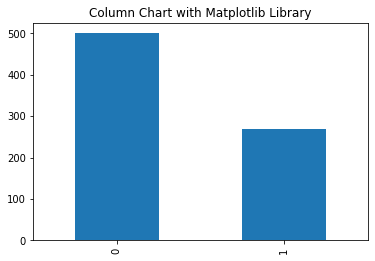

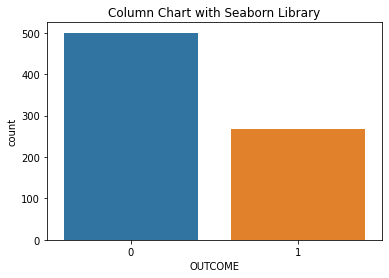

In [22]:
for col in cat_cols:
  cat_summary(df, col, True)

Kategorik değişken olarak sadece hedef değişkenimiz bulunduğu için sadece bu değişken için sınıfların frekansları, oranları ve sütun grafiği geldi.
* Sınıfların frekanslarına baktığımız zaman veri setimiz dengeli değil.
* Dengeli olması için %50'ye %50, %45'e %55 gibi oranlara sahip olması gerekirdi.
---
* OUTCOME kategorik değişkenimizin unique değerlerine bakalım.

In [23]:
df["OUTCOME"].unique()

array([1, 0])

OUTCOME kategorik değişkenimizin eşsiz değer sayısına bakalım.

In [24]:
df["OUTCOME"].nunique()

2

Sadece kategorik değişkenleri veri setinden çekmek istersek.

In [25]:
df[cat_cols].head()

,OUTCOME
0,1
1,0
2,1
3,0
4,1


#### **Sayısal Değişken Analizi (Analysis of Numerical Variables)**

* Sayısal tipteki değişkenleri analiz etmeye çalışalım.
* Eğer elimizdeki değişken sayısal değişken ise bu değişken histogram ve boxplot grafiği ile görselleştirilerek dağılımına bakılır.
* Matplotlib kütüphanesinde hist, seaborn kütüphanesi içinde ise histplot olarak geçer.
* Elimizdeki sayısal tipteki dğeişkenler için grafik özelliği (hem matplotlib hem de seaborn kütüphanesindeki histogram grafiğini çizdirerek) olan analiz fonksiyonu yazalım.

In [26]:
def num_summary(dataframe, numerical_col, plot=False):
  print(numerical_col)
  quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
  print(dataframe[numerical_col].describe(quantiles).T, end="\n\n")
  
  if plot:
    # Matplotlib Library
    dataframe[numerical_col].hist()
    plt.xlabel(numerical_col)
    plt.title("Histogram Graph with Matplotlib Library")
    plt.show(block=True)

    print(" ")

    # Seaborn Library
    sns.histplot(data = dataframe, x=dataframe[numerical_col]);
    plt.title("Histogram Graph with Seaborn Library")

    plt.show(block=True)
    print(" ")

Öncelikle grafik özelliğini kullanmadan çalıştıralım.

In [27]:
for col in num_cols:
  num_summary(df, col)

PREGNANCIES
count   768.000
mean      3.845
std       3.370
min       0.000
5%        0.000
10%       0.000
20%       1.000
30%       1.000
40%       2.000
50%       3.000
60%       4.000
70%       5.000
80%       7.000
90%       9.000
95%      10.000
99%      13.000
max      17.000
Name: PREGNANCIES, dtype: float64

GLUCOSE
count   768.000
mean    120.895
std      31.973
min       0.000
5%       79.000
10%      85.000
20%      95.000
30%     102.000
40%     109.000
50%     117.000
60%     125.000
70%     134.000
80%     147.000
90%     167.000
95%     181.000
99%     196.000
max     199.000
Name: GLUCOSE, dtype: float64

BLOODPRESSURE
count   768.000
mean     69.105
std      19.356
min       0.000
5%       38.700
10%      54.000
20%      60.000
30%      64.000
40%      68.000
50%      72.000
60%      74.000
70%      78.000
80%      82.000
90%      88.000
95%      90.000
99%     106.000
max     122.000
Name: BLOODPRESSURE, dtype: float64

SKINTHICKNESS
count   768.000
mean     20.536
s

Grafik özelliğiyle birlikte çalıştıralım.

PREGNANCIES
count   768.000
mean      3.845
std       3.370
min       0.000
5%        0.000
10%       0.000
20%       1.000
30%       1.000
40%       2.000
50%       3.000
60%       4.000
70%       5.000
80%       7.000
90%       9.000
95%      10.000
99%      13.000
max      17.000
Name: PREGNANCIES, dtype: float64



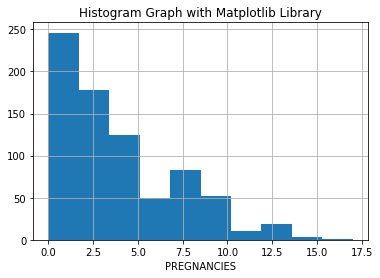

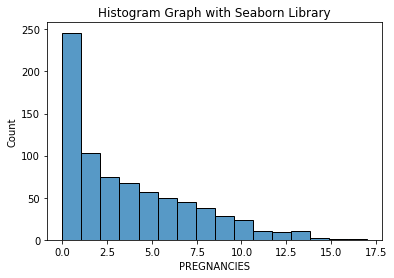

 
GLUCOSE
count   768.000
mean    120.895
std      31.973
min       0.000
5%       79.000
10%      85.000
20%      95.000
30%     102.000
40%     109.000
50%     117.000
60%     125.000
70%     134.000
80%     147.000
90%     167.000
95%     181.000
99%     196.000
max     199.000
Name: GLUCOSE, dtype: float64



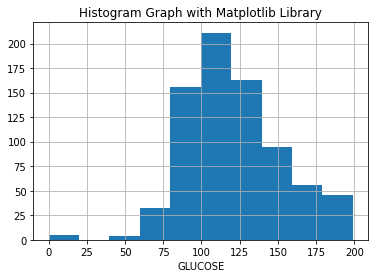

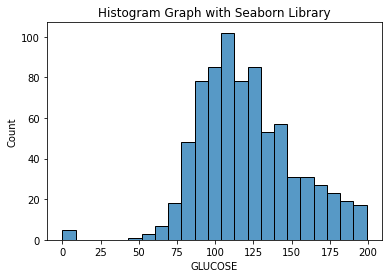

 
BLOODPRESSURE
count   768.000
mean     69.105
std      19.356
min       0.000
5%       38.700
10%      54.000
20%      60.000
30%      64.000
40%      68.000
50%      72.000
60%      74.000
70%      78.000
80%      82.000
90%      88.000
95%      90.000
99%     106.000
max     122.000
Name: BLOODPRESSURE, dtype: float64



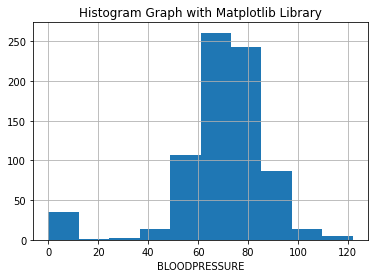

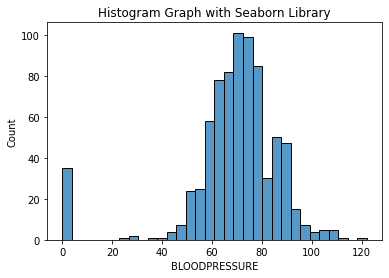

 
SKINTHICKNESS
count   768.000
mean     20.536
std      15.952
min       0.000
5%        0.000
10%       0.000
20%       0.000
30%       8.200
40%      18.000
50%      23.000
60%      27.000
70%      31.000
80%      35.000
90%      40.000
95%      44.000
99%      51.330
max      99.000
Name: SKINTHICKNESS, dtype: float64



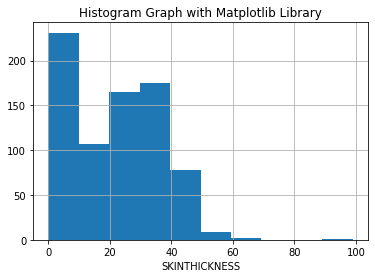

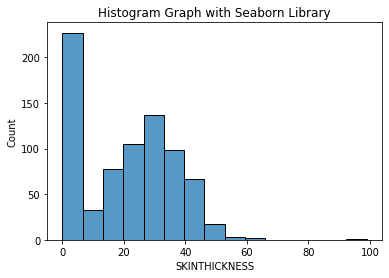

 
INSULIN
count   768.000
mean     79.799
std     115.244
min       0.000
5%        0.000
10%       0.000
20%       0.000
30%       0.000
40%       0.000
50%      30.500
60%      72.200
70%     106.000
80%     150.000
90%     210.000
95%     293.000
99%     519.900
max     846.000
Name: INSULIN, dtype: float64



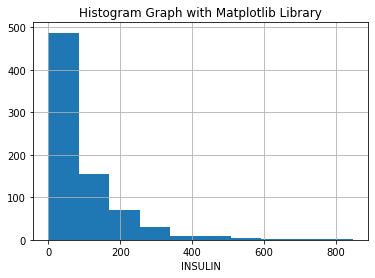

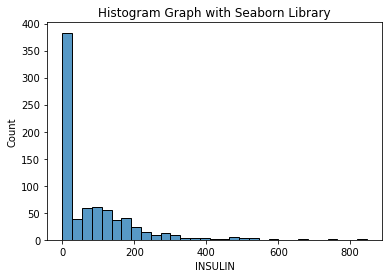

 
BMI
count   768.000
mean     31.993
std       7.884
min       0.000
5%       21.800
10%      23.600
20%      25.900
30%      28.200
40%      30.100
50%      32.000
60%      33.700
70%      35.490
80%      37.800
90%      41.500
95%      44.395
99%      50.759
max      67.100
Name: BMI, dtype: float64



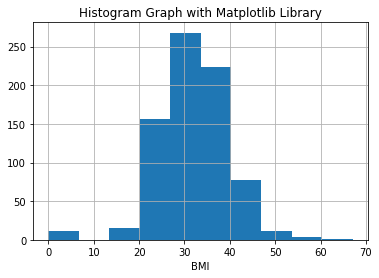

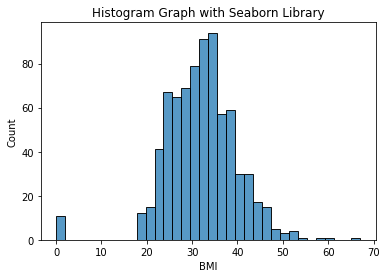

 
DIABETESPEDIGREEFUNCTION
count   768.000
mean      0.472
std       0.331
min       0.078
5%        0.140
10%       0.165
20%       0.219
30%       0.259
40%       0.303
50%       0.372
60%       0.454
70%       0.564
80%       0.687
90%       0.879
95%       1.133
99%       1.698
max       2.420
Name: DIABETESPEDIGREEFUNCTION, dtype: float64



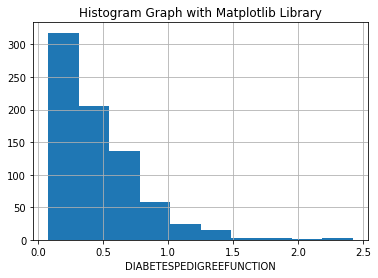

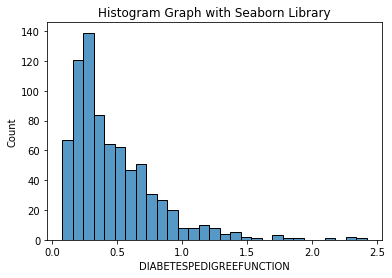

 
AGE
count   768.000
mean     33.241
std      11.760
min      21.000
5%       21.000
10%      22.000
20%      23.000
30%      25.000
40%      27.000
50%      29.000
60%      33.000
70%      38.000
80%      42.600
90%      51.000
95%      58.000
99%      67.000
max      81.000
Name: AGE, dtype: float64



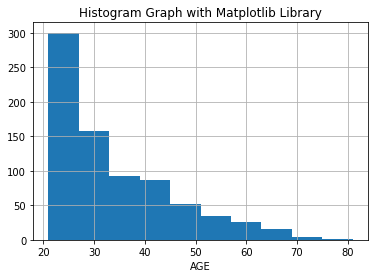

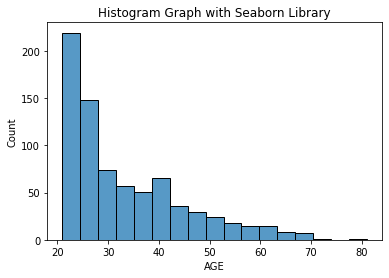

In [28]:
for col in num_cols:
  num_summary(df, col, plot=True)

### **Adım 4:**

Hedef değişken analizi yapınız. (Kategorik değişkenlere göre hedef değişkenin ortalaması, hedef değişkene göre
numerik değişkenlerin ortalaması)

#### **Hedef Değişkenin Kategorik Değişkenler ile Analizi**

Elimizdeki hedef değişkenini kategorik değişkenler ve sayısal değişkenler açısından analiz etmek istesek de kategorik değişken olarak sadece hedef değişkenimiz olduğu için bu işlem gerçekleşemez.

#### **Hedef Değişkenin Sayısal Değişkenler ile Analizi**

* Tüm sayısal değişkenleri hedef değişken kırılımında ortalamasını, count değerini ve standart sapmasını  alarak analiz etmeye çalışalım.
* Bunun için bir fonksiyon yazalım.

In [29]:
def target_summary_with_num(dataframe, target, numerical_col):
    print(pd.DataFrame(dataframe.groupby(target).agg({numerical_col : ["mean", "std", "count"]})), end="\n\n\n")

In [30]:
for col in num_cols:
  target_summary_with_num(df, "OUTCOME", col)

        PREGNANCIES            
               mean   std count
OUTCOME                        
0             3.298 3.017   500
1             4.866 3.741   268


        GLUCOSE             
           mean    std count
OUTCOME                     
0       109.980 26.141   500
1       141.257 31.940   268


        BLOODPRESSURE             
                 mean    std count
OUTCOME                           
0              68.184 18.063   500
1              70.825 21.492   268


        SKINTHICKNESS             
                 mean    std count
OUTCOME                           
0              19.664 14.890   500
1              22.164 17.680   268


        INSULIN              
           mean     std count
OUTCOME                      
0        68.792  98.865   500
1       100.336 138.689   268


           BMI            
          mean   std count
OUTCOME                   
0       30.304 7.690   500
1       35.143 7.263   268


        DIABETESPEDIGREEFUNCTION            
   

* Diyabet hastası olan kadınlar yaklaşık ortalama olarak 5 kez hamile kalmış, olmayanlar ise yaklaşık ortalama olarak 3 kez hamile kalmış.
* Diyabet hastası olan kadınların yaş ortalaması 37, olmayanların ortalaması ise 31.

### **Adım 5:**

**Aykırı (Outliers) gözlem analizi yapınız.**

* Veri setindeki sayısal değişkenlerin genel eğilimin dışında kalan değerlere aykırı değer denir.
* Aykırı gözlemleri boxplot (kutu grafiği) yöntemi ile tespit edelim.
* Aykırı gözlemleri tespit etmek için kullanabileceğim yöntemlerie bakalım öncelikle.
1. Sektör Bilgisi.
2. Standar Sapma Yaklaşımı.
3. Z-Skoru Yaklaşımı.
4. Boxplot (interquartile range - IQR) Yöntemi

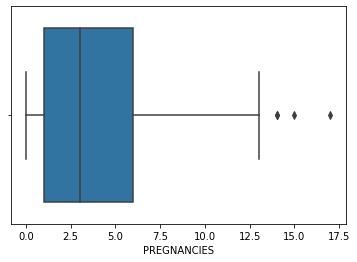

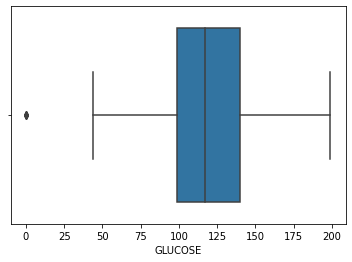

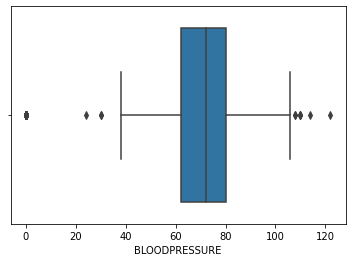

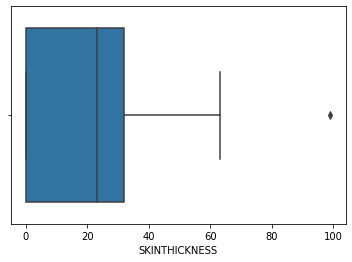

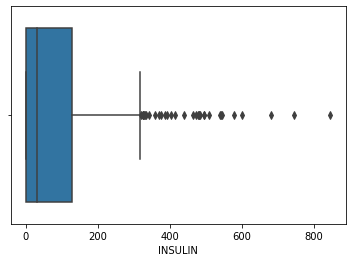

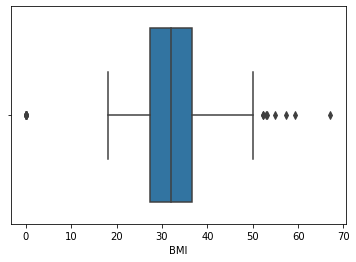

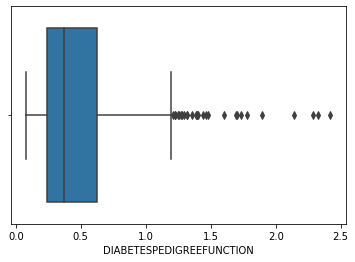

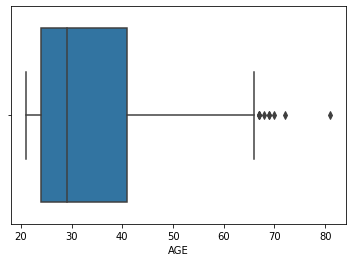

In [31]:
for col in num_cols:
  sns.boxplot(x = df[col])
  plt.show(block=True)

* Görüldüğü üzere değişkenlerin tamamında aykırı değer görülmekte.
* Aykırı değerlerin eşik değerlerine (alt sınır ve üst sınır değerleri) erişmek için bir fonksiyon yazalım.
* q1 ve q3 değerlerimizi çok değişkenli aykırılıkları göz önünde bulundurarak %5'e %95 yapalım.

In [32]:
def outlier_thresholds(dataframe, col_name, q1=0.25, q3=0.75):
  quartile1 = dataframe[col_name].quantile(q1)
  quartile3 = dataframe[col_name].quantile(q3)
  interquantile_range = quartile3 - quartile1
  up_limit = quartile3 + 1.5 * interquantile_range
  low_limit = quartile1 - 1.5 * interquantile_range
  return low_limit, up_limit

In [33]:
for col in num_cols:
  print(col, outlier_thresholds(df, col))

PREGNANCIES (-6.5, 13.5)
GLUCOSE (37.125, 202.125)
BLOODPRESSURE (35.0, 107.0)
SKINTHICKNESS (-48.0, 80.0)
INSULIN (-190.875, 318.125)
BMI (13.35, 50.550000000000004)
DIABETESPEDIGREEFUNCTION (-0.32999999999999996, 1.2)
AGE (-1.5, 66.5)


Veri setimiz de aykırı değer var mı sorusuna cevap bulacağımız bir fonksiyon yazalım..

In [34]:
def check_outlier(dataframe, col_name):
  low_limit, up_limit = outlier_thresholds(dataframe, col_name)
  if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
    return True
  else:
    return False

In [35]:
for col in num_cols:
  print(col, check_outlier(df, col))

PREGNANCIES True
GLUCOSE True
BLOODPRESSURE True
SKINTHICKNESS True
INSULIN True
BMI True
DIABETESPEDIGREEFUNCTION True
AGE True


* Değişkenlerin tamamında aykırı değer bulunmakta.
* Aykırı değere sahip gözlemleri erişmek için bir fonksiyon yazalım.

In [36]:
def grab_outliers(dataframe, col_name, index=False):
  low, up = outlier_thresholds(dataframe, col_name)

  if dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].shape[0] > 10:
    print(dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].head())
  else:
    print(dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))])
  
  if index:
    outlier_index = dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].index
    print(outlier_index)
    print(f"Aykırı değerlere sahip gözlem sayıları: {len(outlier_index)}")
    return outlier_index

Aykırı değere sahip tüm değişkenlerin gözlemlerine ve index bilgilerine erişelim.

In [37]:
sum_outliers = []
for col in num_cols:
  print(f"{col} Değişkenine Ait Aykırı Gözlemler")
  #grab_outliers(df, col, index=True)
  outlier_index = grab_outliers(df, col, index=True)
  sum_outliers.append(len(outlier_index))
  print(" ")
print(f"Toplam Aykırı Gözlem Sayısı: {sum(sum_outliers)}")

PREGNANCIES Değişkenine Ait Aykırı Gözlemler
     PREGNANCIES  GLUCOSE  BLOODPRESSURE  SKINTHICKNESS  INSULIN    BMI  DIABETESPEDIGREEFUNCTION  AGE  OUTCOME
88            15      136             70             32      110 37.100                     0.153   43        1
159           17      163             72             41      114 40.900                     0.817   47        1
298           14      100             78             25      184 36.600                     0.412   46        1
455           14      175             62             30        0 33.600                     0.212   38        1
Int64Index([88, 159, 298, 455], dtype='int64')
Aykırı değerlere sahip gözlem sayıları: 4
 
GLUCOSE Değişkenine Ait Aykırı Gözlemler
     PREGNANCIES  GLUCOSE  BLOODPRESSURE  SKINTHICKNESS  INSULIN    BMI  DIABETESPEDIGREEFUNCTION  AGE  OUTCOME
75             1        0             48             20        0 24.700                     0.140   22        0
182            1        0             7

* Akırı değere sahip tüm gözlemlerin sayıları toplam 146 tane.
* Yani 768 tane gözlemin 146 tanesi aykırı.
* Bunları silebilirz ya da baskılayabiliriz.
* Silmek doğru bir seçim olmayacaktır.
* Çünkü veri kaybına sebep olur.
* Baskılama yapalım.
* Yani alt sınır değerlerinin altında kalanları alt sınır değerler ile üst sınır değerinin üstünde kalan değerlere ise üst sınır değer ile değiştirelim.


In [38]:
def replace_with_threasholds(dataframe, variable):
  low_limit, up_limit = outlier_thresholds(dataframe, variable)
  dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
  dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

Aykırı değere sahip tüm sayısal değişkenler için aykırı değerleri eşik değerleri ile baskılayalım.

In [39]:
for col in num_cols:
  replace_with_threasholds(df, col)

* Aykırı değer problemimiz çözüldü.
* Tekrardan aykırı değer sorgusu yapalım.

In [40]:
for col in num_cols:
  print(col, check_outlier(df,col))

PREGNANCIES False
GLUCOSE False
BLOODPRESSURE False
SKINTHICKNESS False
INSULIN False
BMI False
DIABETESPEDIGREEFUNCTION False
AGE False


Görüldüğü üzere artık aykırı değerimiz kalmadı.

### **Adım 6:**

Eksik gözlem analizi yapınız.

Eksik gözlemlerimizi değişken bazında inceleyelim.

In [41]:
df.isnull().sum()

PREGNANCIES                 0
GLUCOSE                     0
BLOODPRESSURE               0
SKINTHICKNESS               0
INSULIN                     0
BMI                         0
DIABETESPEDIGREEFUNCTION    0
AGE                         0
OUTCOME                     0
dtype: int64

* Yukarıda görüldüğü üzere aykırı değer yok.
* Normalde GLUCOSE,	BLOODPRESSURE, SKINTHICKNESS, INSULIN,	BMI değişkenlerinde sıfır değer olamaz.
* Yani bu demek oluyor ki eksik değerler veri setinde 0 ile doldurulmuş.
* Ama GLUCOSE, BLOODPRESSURE, SKINTHICKNESS ve BMI değişkenleri aykırı gözlem çalışmalarında sıfır değerler aykırı değerler takılıp baskılanmış.
* Bundan dolayı sadece SKINTHICKNESS ve INSULIN değişkenlerinde 0 değerlerini eksik değere dönüştürüp ardından o eksik değerleri doldurma çalışması yapacağız.

In [42]:
df[["SKINTHICKNESS", "INSULIN"]] = df[["SKINTHICKNESS", "INSULIN"]].replace(0, np.NaN)

In [43]:
df.head()

,PREGNANCIES,GLUCOSE,BLOODPRESSURE,SKINTHICKNESS,INSULIN,BMI,DIABETESPEDIGREEFUNCTION,AGE,OUTCOME
0,6.000,148.000,72,35.000,NaN,33.600,0.627,50.000,1
1,1.000,85.000,66,29.000,NaN,26.600,0.351,31.000,0
2,8.000,183.000,64,NaN,NaN,23.300,0.672,32.000,1
3,1.000,89.000,66,23.000,94.000,28.100,0.167,21.000,0
4,0.000,137.000,40,35.000,168.000,43.100,1.200,33.000,1


In [44]:
df.isnull().sum()

PREGNANCIES                   0
GLUCOSE                       0
BLOODPRESSURE                 0
SKINTHICKNESS               227
INSULIN                     374
BMI                           0
DIABETESPEDIGREEFUNCTION      0
AGE                           0
OUTCOME                       0
dtype: int64

* Görüldüğü üzere SKINTHICKNESS ve INSULIN değişkenlerinde eksik değer var.
* Burada eksik değere sahip olan değişkenin OUTCOME değeri 0'a karşılık gelen eksik değerlere sıfır değere karşılık gelen tüm değerlerin ortalmaası ile OUTCOME değeri 1'a karşılık gelen eksik değerlere, 1 değere karşılık gelen tüm değerlerin ortalmaası ile dolduralım.
* Bunun yapmamızın sebebi doldurulacak olan eksik değerleri daha da hassaslaştırmaktır.

In [45]:
df["SKINTHICKNESS"][df["OUTCOME"] == 0].mean()

27.235457063711912

In [46]:
df["SKINTHICKNESS"].mean()

29.11829944547135

In [47]:
missing_variables = ["SKINTHICKNESS", "INSULIN"]

In [48]:
for col in missing_variables:
  df[col][(df[col].isnull()) & (df["OUTCOME"] == 0)] = df[col][(df[col].isnull()) & (df["OUTCOME"] == 0)].fillna(df[col][df["OUTCOME"] == 0].mean())
  df[col][(df[col].isnull()) & (df["OUTCOME"] == 1)] = df[col][(df[col].isnull()) & (df["OUTCOME"] == 1)].fillna(df[col][df["OUTCOME"] == 0].mean())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Tekrardan aykırı değer sorgusu yapalım.

In [49]:
df.isnull().values.any()

False

Değişken bazında eksik değer sorgusu yapalım.

In [50]:
df.isnull().sum()

PREGNANCIES                 0
GLUCOSE                     0
BLOODPRESSURE               0
SKINTHICKNESS               0
INSULIN                     0
BMI                         0
DIABETESPEDIGREEFUNCTION    0
AGE                         0
OUTCOME                     0
dtype: int64

###**Adım 7:**

Korelasyon analizi yapınız.

Korelasyon analizi için bir fonksiyon yazalım.

In [51]:
def high_correlated_cols(dataframe, plot=False, corr_th = 0.90):
  corr = dataframe.corr() # korelasyon değrerini oluşturduk.
  cor_matrix = corr.abs() # sonra bunun mutlak değerini aldık.
  upper_triangle_matrix = cor_matrix.where(np.triu(np.ones(cor_matrix.shape), k=1).astype(bool)) # Köşegen elemanlarına göre düzeltme işlemi yaptık.
  drop_list = [col for col in upper_triangle_matrix.columns if any(upper_triangle_matrix[col] > corr_th)] # Belirli bir korelasyonun üzerinde olanları seç dedik. Ve liste içine atadık.
  
  if plot:
    import seaborn as sns
    import matplotlib.pyplot as plt
    sns.set(rc = {"figure.figsize" : (12,12)})
    sns.heatmap(corr, cmap = "RdBu")
    plt.show()

  return drop_list

In [52]:
high_correlated_cols(df)

[]

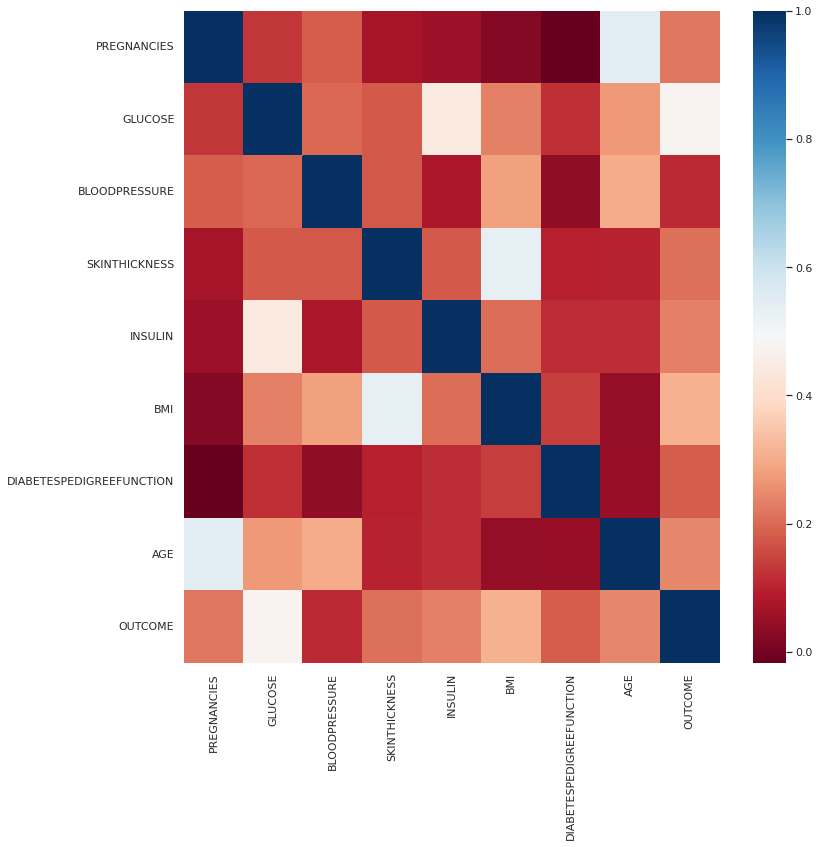

In [53]:
drop_list = high_correlated_cols(df, plot=True)

In [54]:
drop_list

[]

* Görüldüğü üzere korelasyon değeri yüksek bir değişkenimiz yok.
* Korelasyonu yüksek bir dğeişkenimiz olmadığı için silmemizi gerektirecek bir değişkenimiz de yok.

## **Görev 2: Feature Engineering**

### **Adım 1:**

* Eksik ve aykırı değerler için gerekli işlemleri yapınız. 
* Veri setinde eksik gözlem bulunmamakta ama Glikoz, Insulin vb.
değişkenlerde 0 değeri içeren gözlem birimleri eksik değeri ifade ediyor olabilir. 
* Örneğin; bir kişinin glikoz veya insulin değeri 0
olamayacaktır. 
* Bu durumu dikkate alarak sıfır değerlerini ilgili değerlerde NaN olarak atama yapıp sonrasında eksik
değerlere işlemleri uygulayabilirsiniz.

Bu adım eksik değer adımında yapılmıştır.

### **Adım 2:**

Yeni değişkenler oluşturunuz.

In [55]:
df.head()

,PREGNANCIES,GLUCOSE,BLOODPRESSURE,SKINTHICKNESS,INSULIN,BMI,DIABETESPEDIGREEFUNCTION,AGE,OUTCOME
0,6.000,148.000,72,35.000,123.321,33.600,0.627,50.000,1
1,1.000,85.000,66,29.000,123.321,26.600,0.351,31.000,0
2,8.000,183.000,64,27.235,123.321,23.300,0.672,32.000,1
3,1.000,89.000,66,23.000,94.000,28.100,0.167,21.000,0
4,0.000,137.000,40,35.000,168.000,43.100,1.200,33.000,1


**Age Level**

In [56]:
df.loc[(df["AGE"] < 30), "NEW_AGE_CAT"] = "young" #young
df.loc[((df["AGE"] > 30) & (df["AGE"] < 56)), "NEW_AGE_CAT"] = "mature" #olgun
df.loc[(df["AGE"] >= 56), "NEW_AGE_CAT"] = "senior" #uzman

In [57]:
df.head()

,PREGNANCIES,GLUCOSE,BLOODPRESSURE,SKINTHICKNESS,INSULIN,BMI,DIABETESPEDIGREEFUNCTION,AGE,OUTCOME,NEW_AGE_CAT
0,6.000,148.000,72,35.000,123.321,33.600,0.627,50.000,1,mature
1,1.000,85.000,66,29.000,123.321,26.600,0.351,31.000,0,mature
2,8.000,183.000,64,27.235,123.321,23.300,0.672,32.000,1,mature
3,1.000,89.000,66,23.000,94.000,28.100,0.167,21.000,0,young
4,0.000,137.000,40,35.000,168.000,43.100,1.200,33.000,1,mature


**BMI Level**

In [58]:
df.loc[(df["BMI"] <= 18.4), "NEW_BMI"] = "Weak" #zayıf
df.loc[((df["BMI"] > 18.4) & (df["BMI"] <= 24.9)), "NEW_BMI"] = "Healthy Weight" #zayıf
df.loc[((df["BMI"] > 24.9) & (df["BMI"] <= 29.9)), "NEW_BMI"] = "Overweight" #şişman
df.loc[((df["BMI"] > 29.9) & (df["BMI"] <= 34.9)), "NEW_BMI"] = "First Degree Obese"  #1. Derece Obez
df.loc[((df["BMI"] > 34.9) & (df["BMI"] <= 44.9)), "NEW_BMI"] = "Second Degree Obese" #2. Derece Obez
df.loc[((df["BMI"] > 44.9)), "NEW_BMI"] = "Third Degree Obese" #3. Derece Obez

In [59]:
df.head()

,PREGNANCIES,GLUCOSE,BLOODPRESSURE,SKINTHICKNESS,INSULIN,BMI,DIABETESPEDIGREEFUNCTION,AGE,OUTCOME,NEW_AGE_CAT,NEW_BMI
0,6.000,148.000,72,35.000,123.321,33.600,0.627,50.000,1,mature,First Degree Obese
1,1.000,85.000,66,29.000,123.321,26.600,0.351,31.000,0,mature,Overweight
2,8.000,183.000,64,27.235,123.321,23.300,0.672,32.000,1,mature,Healthy Weight
3,1.000,89.000,66,23.000,94.000,28.100,0.167,21.000,0,young,Overweight
4,0.000,137.000,40,35.000,168.000,43.100,1.200,33.000,1,mature,Second Degree Obese


**PREGNANCIES - AGE**

In [60]:
df["NEW_PREGNANCIES_AGE"] = df["PREGNANCIES"] * df["AGE"]

In [61]:
df.head()

,PREGNANCIES,GLUCOSE,BLOODPRESSURE,SKINTHICKNESS,INSULIN,BMI,DIABETESPEDIGREEFUNCTION,AGE,OUTCOME,NEW_AGE_CAT,NEW_BMI,NEW_PREGNANCIES_AGE
0,6.000,148.000,72,35.000,123.321,33.600,0.627,50.000,1,mature,First Degree Obese,300.000
1,1.000,85.000,66,29.000,123.321,26.600,0.351,31.000,0,mature,Overweight,31.000
2,8.000,183.000,64,27.235,123.321,23.300,0.672,32.000,1,mature,Healthy Weight,256.000
3,1.000,89.000,66,23.000,94.000,28.100,0.167,21.000,0,young,Overweight,21.000
4,0.000,137.000,40,35.000,168.000,43.100,1.200,33.000,1,mature,Second Degree Obese,0.000


### **Adım 3:**

Adım 3: Encoding işlemlerini gerçekleştiriniz.

* Label Encoind yapmamıza gerek yok.
* Çünkü iki sınıfa sahip bir kategorik değişkenimiz yok.

**Rare Encoding**

In [62]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Obsertavions - (Gözlem Sayısı): 768
Variables (Değişken Sayısı): 12
cat_cols (Kategorik Değişkenler): 3
num_cols (Sayısal Değişkenler): 9
cat_but_car (Kardinalitesi Yüksek Değişkenler): 0
num_but_cat (Sayısal Görünümlü Kategorik Değişkenler): 1


In [63]:
def rare_analyser(dataframe, target, cat_cols):
    for col in cat_cols:
        print(col, ":", len(dataframe[col].value_counts())) #İlgili kategorik değişkenin kaç sınıfı var bilgisi.
        print(pd.DataFrame({"COUNT": dataframe[col].value_counts(), #Sınıf frekansı
                            "RATIO": dataframe[col].value_counts() / len(dataframe), #Sınıfın tüm ver seti boyutuna oranı.
                            "TARGET_MEAN": dataframe.groupby(col)[target].mean()}), end="\n\n\n") #Bağımlı değişkene göre groupby alınıp ortalama işlemi yapılması.

In [64]:
rare_analyser(df, "OUTCOME", cat_cols)

NEW_AGE_CAT : 3
        COUNT  RATIO  TARGET_MEAN
mature    301  0.392        0.535
senior     50  0.065        0.340
young     396  0.516        0.212


NEW_BMI : 6
                     COUNT  RATIO  TARGET_MEAN
First Degree Obese     224  0.292        0.451
Healthy Weight         102  0.133        0.069
Overweight             179  0.233        0.223
Second Degree Obese    212  0.276        0.453
Third Degree Obese      36  0.047        0.611
Weak                    15  0.020        0.133


OUTCOME : 2
   COUNT  RATIO  TARGET_MEAN
0    500  0.651        0.000
1    268  0.349        1.000




* Sınıflarının frekansları tüm veri setine oranı %1'in altında olanları RARE bir sınıf altında toplamak istedik.
* Çün One Hot Encoding işlemi yapınca her sınıf için değişken oluşturacak ve içerisinde saedece bir tane değer olup diğerlerinin hepsi sıfır olması gereksiz bir değişken oluşturduğumuz anlamına gelir.
* Gereksiz değişkenlerde iterasyon ve optimizasyon sürelerini olumsuz etkiliyor olacaktır.

In [65]:
def rare_encoder(dataframe, rare_perc):
  temp_df = dataframe.copy() #Fonksiyonun bir kopyası alınmış.

  rare_columns = [col for col in df.columns if temp_df[col].dtypes == "O" 
                  and (temp_df[col].value_counts() / len(temp_df) < rare_perc).any(axis=None)]


  for var in rare_columns:
    tmp = temp_df[var].value_counts() / len(temp_df)
    rare_labels = tmp[tmp < rare_perc].index
    temp_df[var] = np.where(temp_df[var].isin(rare_labels), "Rare", temp_df[var])

  return temp_df

In [66]:
df = rare_encoder(df, 0.01)

In [67]:
df.head()

,PREGNANCIES,GLUCOSE,BLOODPRESSURE,SKINTHICKNESS,INSULIN,BMI,DIABETESPEDIGREEFUNCTION,AGE,OUTCOME,NEW_AGE_CAT,NEW_BMI,NEW_PREGNANCIES_AGE
0,6.000,148.000,72,35.000,123.321,33.600,0.627,50.000,1,mature,First Degree Obese,300.000
1,1.000,85.000,66,29.000,123.321,26.600,0.351,31.000,0,mature,Overweight,31.000
2,8.000,183.000,64,27.235,123.321,23.300,0.672,32.000,1,mature,Healthy Weight,256.000
3,1.000,89.000,66,23.000,94.000,28.100,0.167,21.000,0,young,Overweight,21.000
4,0.000,137.000,40,35.000,168.000,43.100,1.200,33.000,1,mature,Second Degree Obese,0.000


In [68]:
rare_analyser(df, "OUTCOME", cat_cols)

NEW_AGE_CAT : 3
        COUNT  RATIO  TARGET_MEAN
mature    301  0.392        0.535
senior     50  0.065        0.340
young     396  0.516        0.212


NEW_BMI : 6
                     COUNT  RATIO  TARGET_MEAN
First Degree Obese     224  0.292        0.451
Healthy Weight         102  0.133        0.069
Overweight             179  0.233        0.223
Second Degree Obese    212  0.276        0.453
Third Degree Obese      36  0.047        0.611
Weak                    15  0.020        0.133


OUTCOME : 2
   COUNT  RATIO  TARGET_MEAN
0    500  0.651        0.000
1    268  0.349        1.000




**One Hot Encoding**

* Eşsiz sınıf değeri 2 olanları zaten label encoder'dan geçirdik.
* O yüzden One Hot Encoder'dan eşsiz sınıf değeri 10'dan küçük 2'den büyük olanları geçirelim.

In [69]:
ohe_cols = [col for col in df.columns if 10 >= df[col].nunique() > 2]

In [70]:
ohe_cols

['NEW_AGE_CAT', 'NEW_BMI']

In [71]:
def one_hot_encoder(dataframe, categorical_cols, drop_first=True):
  dataframe = pd.get_dummies(df, columns=categorical_cols, drop_first = drop_first)
  return dataframe

In [72]:
df = one_hot_encoder(df, ohe_cols)

In [73]:
df.head()

,PREGNANCIES,GLUCOSE,BLOODPRESSURE,SKINTHICKNESS,INSULIN,BMI,DIABETESPEDIGREEFUNCTION,AGE,OUTCOME,NEW_PREGNANCIES_AGE,NEW_AGE_CAT_senior,NEW_AGE_CAT_young,NEW_BMI_Healthy Weight,NEW_BMI_Overweight,NEW_BMI_Second Degree Obese,NEW_BMI_Third Degree Obese,NEW_BMI_Weak
0,6.000,148.000,72,35.000,123.321,33.600,0.627,50.000,1,300.000,0,0,0,0,0,0,0
1,1.000,85.000,66,29.000,123.321,26.600,0.351,31.000,0,31.000,0,0,0,1,0,0,0
2,8.000,183.000,64,27.235,123.321,23.300,0.672,32.000,1,256.000,0,0,1,0,0,0,0
3,1.000,89.000,66,23.000,94.000,28.100,0.167,21.000,0,21.000,0,1,0,1,0,0,0
4,0.000,137.000,40,35.000,168.000,43.100,1.200,33.000,1,0.000,0,0,0,0,1,0,0


Tekrardan değişkenlerimizi tiplerine göre ayıralım.

In [74]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Obsertavions - (Gözlem Sayısı): 768
Variables (Değişken Sayısı): 17
cat_cols (Kategorik Değişkenler): 8
num_cols (Sayısal Değişkenler): 9
cat_but_car (Kardinalitesi Yüksek Değişkenler): 0
num_but_cat (Sayısal Görünümlü Kategorik Değişkenler): 8


### **Adım 4:**

Numerik değişkenler için standartlaştırma yapınız.

Standart Scaler ile ölçekledirme yapalım.
* Ölçeklendirme yapmamızın sebebi sayısal değişkenleri dağılımını bozmadan bir arada değerlendirme imkanı sağlaması için.
* Sayısal değişkenleri alalım.

In [75]:
def grab_col_names(dataframe, cat_th = 10, car_th = 20):
  """
    Veri setindeki kategorik, numerik ve kategorik fakat kardinal değişkenlerin isimlerini verir.
    Not: Kategorik değişkenlerin içerisinde numerik görünümlü kategorik değişkenler de dahildir.

    Parameters
    ----------
    dataframe: dataframe
        değişken isimleri alınmak istenen dataframe'dir.
    cat_th: int, float
        numerik fakat kategorik olan değişkenler için sınıf eşik değeri
    car_th: int, float
        kategorik fakat kardinal değişkenler için sınıf eşik değeri

    Returns
    -------
    cat_cols: list
        Kategorik değişken listesi
    num_cols: list
        Numerik değişken listesi
    cat_but_car: list
        Kategorik görünümlü kardinal değişken listesi

    Notes
    ------
    cat_cols + num_cols + cat_but_car = toplam değişken sayısı
    num_but_cat cat_cols'un içerisinde.
  """
  # Kategorik Değişkenler: cat_cols & num_but_car
  cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
  num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and dataframe[col].dtypes != "O"] 
  cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and dataframe[col].dtypes == "O"]
  cat_cols += num_but_cat
  cat_cols = [col for col in cat_cols if col not in cat_but_car]

  # Numerik Değişkenler: num_cols
  num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
  num_cols = [col for col in num_cols if col not in num_but_cat]



  # Raporlama Bölümü:
  print(f"Obsertavions: {dataframe.shape[0]}")
  print(f"Variables: {dataframe.shape[1]}")
  print(f"cat_cols: {len(cat_cols)}")
  print(f"num_cols: {len(num_cols)}")
  print(f"cat_but_car: {len(cat_but_car)}")
  print(f"num_but_cat: {len(num_but_cat)}")

  return cat_cols, num_cols, cat_but_car

In [76]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Obsertavions: 768
Variables: 17
cat_cols: 8
num_cols: 9
cat_but_car: 0
num_but_cat: 8


In [77]:
cat_cols

['OUTCOME',
 'NEW_AGE_CAT_senior',
 'NEW_AGE_CAT_young',
 'NEW_BMI_Healthy Weight',
 'NEW_BMI_Overweight',
 'NEW_BMI_Second Degree Obese',
 'NEW_BMI_Third Degree Obese',
 'NEW_BMI_Weak']

In [78]:
num_cols

['PREGNANCIES',
 'GLUCOSE',
 'BLOODPRESSURE',
 'SKINTHICKNESS',
 'INSULIN',
 'BMI',
 'DIABETESPEDIGREEFUNCTION',
 'AGE',
 'NEW_PREGNANCIES_AGE']

In [79]:
scaler = StandardScaler()

In [80]:
df[num_cols] = scaler.fit_transform(df[num_cols])

In [81]:
df[num_cols].head()

,PREGNANCIES,GLUCOSE,BLOODPRESSURE,SKINTHICKNESS,INSULIN,BMI,DIABETESPEDIGREEFUNCTION,AGE,NEW_PREGNANCIES_AGE
0,0.647,0.862,0.093,0.744,-0.171,0.209,0.589,1.446,0.951
1,-0.849,-1.159,-0.330,0.051,-0.171,-0.784,-0.378,-0.189,-0.741
2,1.246,1.985,-0.471,-0.153,-0.171,-1.253,0.747,-0.103,0.675
3,-0.849,-1.031,-0.330,-0.643,-0.653,-0.571,-1.023,-1.050,-0.804
4,-1.148,0.509,-2.163,0.744,0.564,1.558,2.597,-0.017,-0.936


In [82]:
df.head()

,PREGNANCIES,GLUCOSE,BLOODPRESSURE,SKINTHICKNESS,INSULIN,BMI,DIABETESPEDIGREEFUNCTION,AGE,OUTCOME,NEW_PREGNANCIES_AGE,NEW_AGE_CAT_senior,NEW_AGE_CAT_young,NEW_BMI_Healthy Weight,NEW_BMI_Overweight,NEW_BMI_Second Degree Obese,NEW_BMI_Third Degree Obese,NEW_BMI_Weak
0,0.647,0.862,0.093,0.744,-0.171,0.209,0.589,1.446,1,0.951,0,0,0,0,0,0,0
1,-0.849,-1.159,-0.330,0.051,-0.171,-0.784,-0.378,-0.189,0,-0.741,0,0,0,1,0,0,0
2,1.246,1.985,-0.471,-0.153,-0.171,-1.253,0.747,-0.103,1,0.675,0,0,1,0,0,0,0
3,-0.849,-1.031,-0.330,-0.643,-0.653,-0.571,-1.023,-1.050,0,-0.804,0,1,0,1,0,0,0
4,-1.148,0.509,-2.163,0.744,0.564,1.558,2.597,-0.017,1,-0.936,0,0,0,0,1,0,0


### **Adım 5:**

Model oluşturunuz.

* Öncelikle veri setimizi Holdout yöntemiyle özellikler ve hedef değişken olarak ikiye bölelim.
* Ardından eğitim ve test verisi olarak ikiye bölelim.

In [83]:
y = df["OUTCOME"]

In [84]:
X = df.drop(["OUTCOME"], axis=1)

#### **Model Doğrulama Yapmadan Modeli Eğitme ve Test Etme**

Bu aşamada modelin gördüğü veri seti ile modeli test edeceğiz.
* Bu işlem bir dezavantajdır.
* Overfitting (aşırı öğrenme) olur.
* Model veriyi öğrenir ezberler.
* Bizim istedeiğimiz verinin özütünü öğrenmesidir.

##### **Logistic Regresyon**

**Model**

In [85]:
log_model = LogisticRegression(random_state=42)

In [86]:
log_model = log_model.fit(X, y)

**Tahmin**

In [87]:
y_pred = log_model.predict(X)

In [88]:
y_pred[0:5]

array([1, 0, 1, 0, 1])

**Başarı Değerlendirme**

**Classification Report**

In [89]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.87      0.84       500
           1       0.72      0.60      0.66       268

    accuracy                           0.78       768
   macro avg       0.76      0.74      0.75       768
weighted avg       0.78      0.78      0.77       768



**Accuracy Score**

In [90]:
accuracy_score(y, y_pred)

0.7799479166666666

**Reccal Score**

In [91]:
recall_score(y, y_pred, average=None)

array([0.874     , 0.60447761])

**Precision Score**

In [92]:
precision_score(y, y_pred, average=None)

array([0.80478821, 0.72      ])

**F-1 Score**

In [93]:
f1_score(y, y_pred, average=None)

array([0.8379674 , 0.65720081])

**ROC CURVE**

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


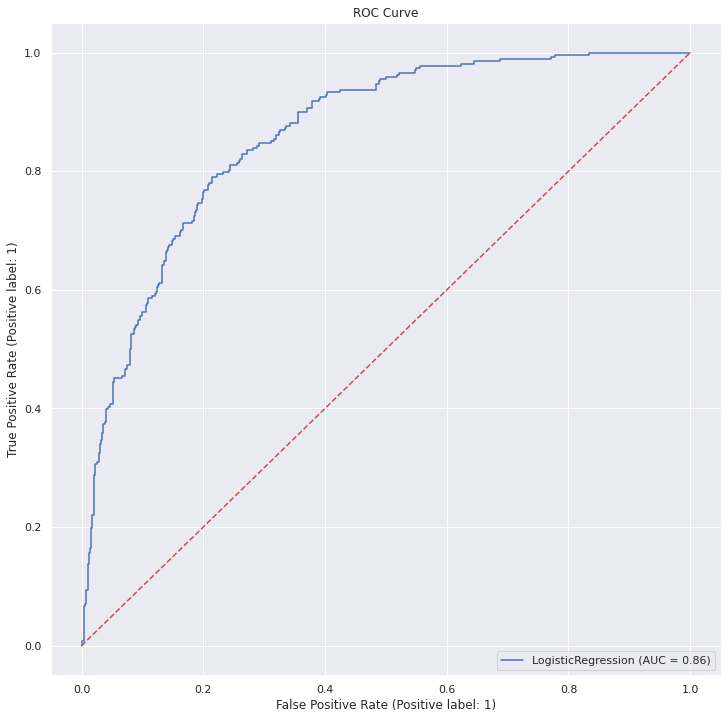

In [94]:
plot_roc_curve(log_model, X, y)
plt.title("ROC Curve")
plt.plot([0, 1], [0, 1], "r--")
plt.show();

ROC AUC

In [95]:
y_prob = log_model.predict_proba(X)[:,1]

In [348]:
y_prob[:5]

array([0.0135784 , 0.8636501 , 0.04185656, 0.02491302, 0.1966982 ],
      dtype=float32)

In [97]:
roc_auc_score(y, y_prob)

0.8615671641791045

##### **KNN**

**Model**

In [98]:
knn_model = KNeighborsClassifier()

In [99]:
knn_model = knn_model.fit(X, y)

**Tahmin**

In [100]:
y_pred = knn_model.predict(X)

In [101]:
y_pred[0:5]

array([1, 0, 1, 0, 1])

**Başarı Değerlendirme**

**Classification Report**

In [102]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88       500
           1       0.79      0.74      0.76       268

    accuracy                           0.84       768
   macro avg       0.83      0.82      0.82       768
weighted avg       0.84      0.84      0.84       768



**Accuracy Score**

In [103]:
accuracy_score(y, y_pred)

0.83984375

**Reccal Score**

In [104]:
recall_score(y, y_pred, average=None)

array([0.892     , 0.74253731])

**Precision Score**

In [105]:
precision_score(y, y_pred, average=None)

array([0.86601942, 0.78656126])

**F-1 Score**

In [106]:
f1_score(y, y_pred, average=None)

array([0.87881773, 0.76391555])

**ROC CURVE**

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


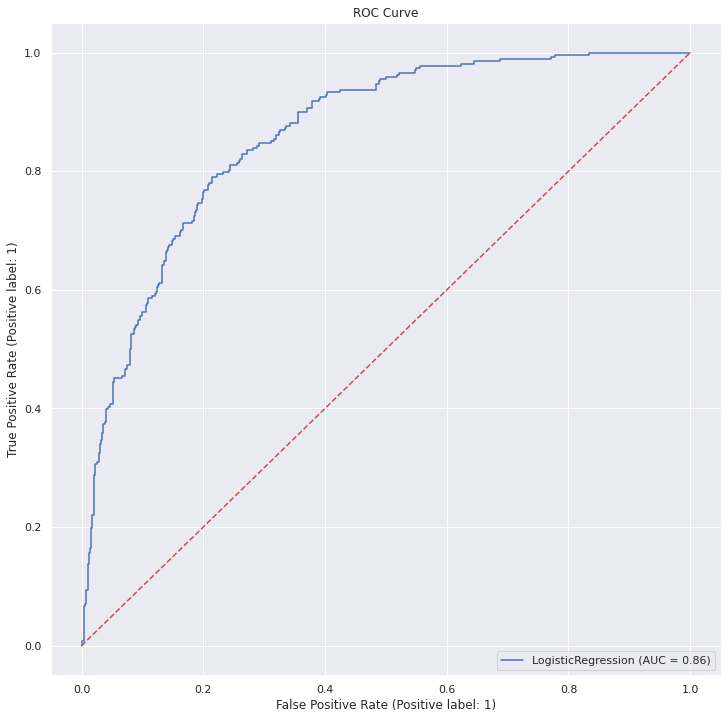

In [107]:
plot_roc_curve(log_model, X, y)
plt.title("ROC Curve")
plt.plot([0, 1], [0, 1], "r--")
plt.show();

ROC AUC

In [108]:
y_prob = log_model.predict_proba(X)[:,1]

In [109]:
y_prob[:5]

array([0.84559817, 0.06354019, 0.69581968, 0.02837399, 0.86340023])

In [110]:
roc_auc_score(y, y_prob)

0.8615671641791045

##### **Random Forest**

**Model**

In [111]:
rf_model = RandomForestClassifier(random_state=42)

In [112]:
rf_model = rf_model.fit(X, y)

**Tahmin**

In [113]:
y_pred = rf_model.predict(X)

In [114]:
y_pred[0:5]

array([1, 0, 1, 0, 1])

**Başarı Değerlendirme**

**Classification Report**

In [115]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       500
           1       1.00      1.00      1.00       268

    accuracy                           1.00       768
   macro avg       1.00      1.00      1.00       768
weighted avg       1.00      1.00      1.00       768



**Accuracy Score**

In [116]:
accuracy_score(y, y_pred)

1.0

**Reccal Score**

In [117]:
recall_score(y, y_pred, average=None)

array([1., 1.])

**Precision Score**

In [118]:
precision_score(y, y_pred, average=None)

array([1., 1.])

**F-1 Score**

In [119]:
f1_score(y, y_pred, average=None)

array([1., 1.])

**ROC CURVE**

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


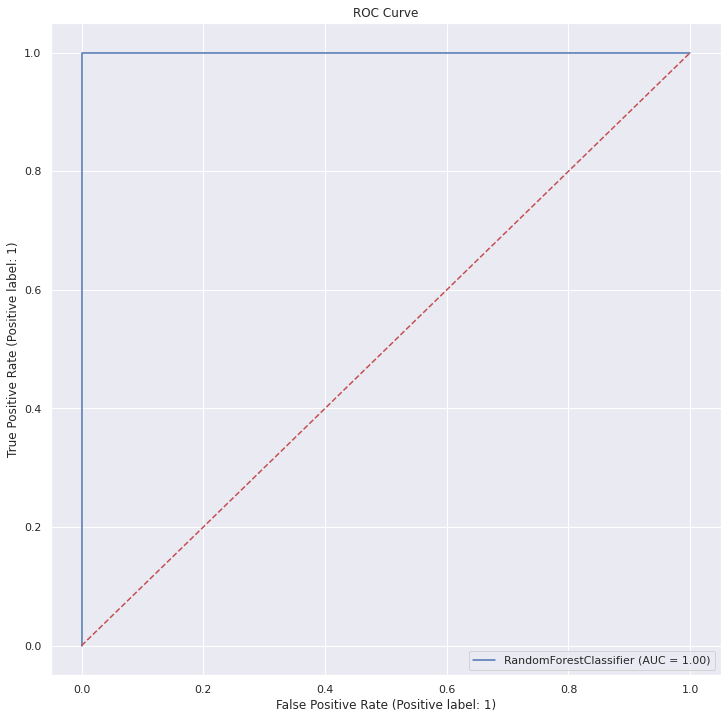

In [120]:
plot_roc_curve(rf_model, X, y)
plt.title("ROC Curve")
plt.plot([0, 1], [0, 1], "r--")
plt.show();

ROC AUC

In [121]:
y_prob = rf_model.predict_proba(X)[:,1]

In [122]:
y_prob[:5]

array([0.83, 0.  , 0.84, 0.02, 0.92])

In [123]:
roc_auc_score(y, y_prob)

1.0

##### **SVC**

**Model**

In [124]:
svc_model = SVC(random_state=42)

In [125]:
svc_model = svc_model.fit(X, y)

**Tahmin**

In [126]:
y_pred = svc_model.predict(X)

In [127]:
y_pred[0:5]

array([1, 0, 1, 0, 1])

**Başarı Değerlendirme**

**Classification Report**

In [128]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88       500
           1       0.81      0.67      0.74       268

    accuracy                           0.83       768
   macro avg       0.83      0.79      0.81       768
weighted avg       0.83      0.83      0.83       768



**Accuracy Score**

In [129]:
accuracy_score(y, y_pred)

0.83203125

**Reccal Score**

In [130]:
recall_score(y, y_pred, average=None)

array([0.918     , 0.67164179])

**Precision Score**

In [131]:
precision_score(y, y_pred, average=None)

array([0.83912249, 0.81447964])

**F-1 Score**

In [132]:
f1_score(y, y_pred, average=None)

array([0.87679083, 0.73619632])

**ROC CURVE**

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


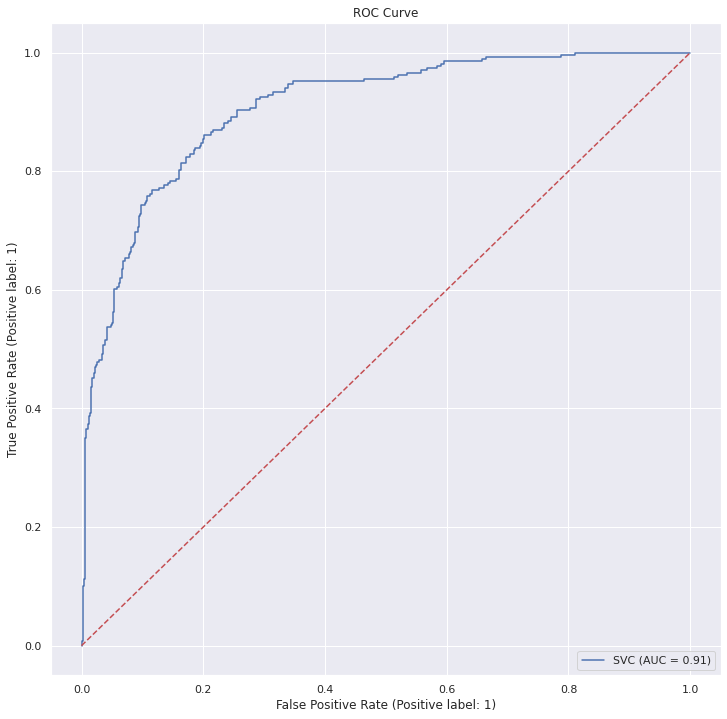

In [133]:
plot_roc_curve(svc_model, X, y)
plt.title("ROC Curve")
plt.plot([0, 1], [0, 1], "r--")
plt.show();

##### **Decision Tree**

**Model**

In [134]:
dt_model = DecisionTreeClassifier(random_state=42)

In [135]:
dt_model = dt_model.fit(X, y)

**Tahmin**

In [136]:
y_pred = dt_model.predict(X)

In [137]:
y_pred[0:5]

array([1, 0, 1, 0, 1])

**Başarı Değerlendirme**

**Classification Report**

In [138]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       500
           1       1.00      1.00      1.00       268

    accuracy                           1.00       768
   macro avg       1.00      1.00      1.00       768
weighted avg       1.00      1.00      1.00       768



**Accuracy Score**

In [139]:
accuracy_score(y, y_pred)

1.0

**Reccal Score**

In [140]:
recall_score(y, y_pred, average=None)

array([1., 1.])

**Precision Score**

In [141]:
precision_score(y, y_pred, average=None)

array([1., 1.])

**F-1 Score**

In [142]:
f1_score(y, y_pred, average=None)

array([1., 1.])

**ROC CURVE**

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


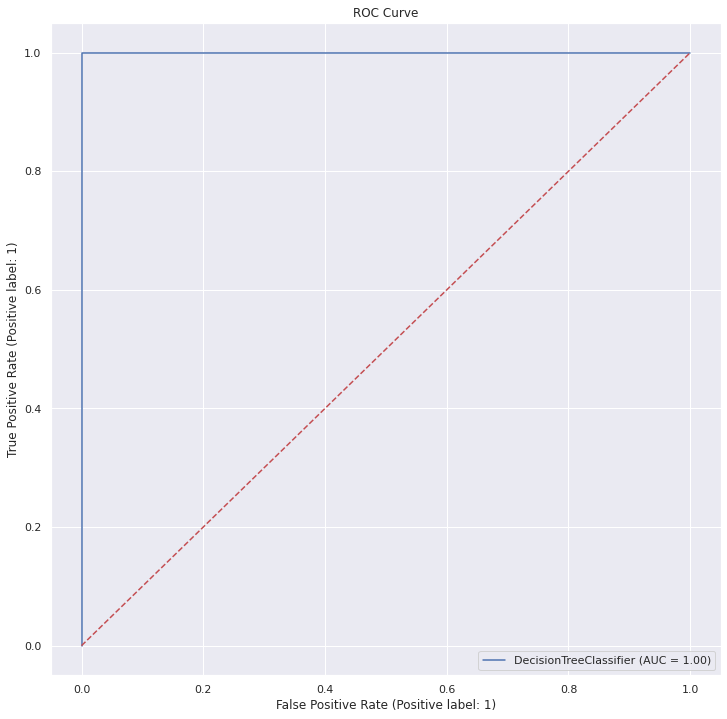

In [143]:
plot_roc_curve(dt_model, X, y)
plt.title("ROC Curve")
plt.plot([0, 1], [0, 1], "r--")
plt.show();

ROC AUC

In [144]:
y_prob = dt_model.predict_proba(X)[:,1]

In [145]:
y_prob[:5]

array([1., 0., 1., 0., 1.])

In [146]:
roc_auc_score(y, y_prob)

1.0

##### **GBM**

**Model**

In [147]:
gbm_model = GradientBoostingClassifier(random_state=42)

In [148]:
gbm_model = gbm_model.fit(X, y)

**Tahmin**

In [149]:
y_pred = gbm_model.predict(X)

In [150]:
y_pred[0:5]

array([1, 0, 1, 0, 1])

**Başarı Değerlendirme**

**Classification Report**

In [151]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.96      0.94       500
           1       0.93      0.83      0.88       268

    accuracy                           0.92       768
   macro avg       0.92      0.90      0.91       768
weighted avg       0.92      0.92      0.92       768



**Accuracy Score**

In [152]:
accuracy_score(y, y_pred)

0.91796875

**Reccal Score**

In [153]:
recall_score(y, y_pred, average=None)

array([0.964     , 0.83208955])

**Precision Score**

In [154]:
precision_score(y, y_pred, average=None)

array([0.91461101, 0.9253112 ])

**F-1 Score**

In [155]:
f1_score(y, y_pred, average=None)

array([0.93865628, 0.8762279 ])

**ROC CURVE**

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


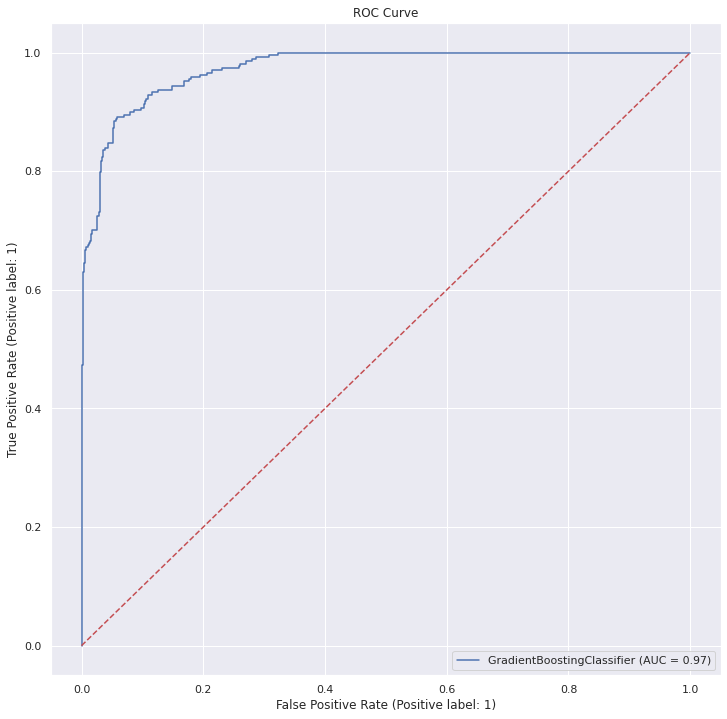

In [156]:
plot_roc_curve(gbm_model, X, y)
plt.title("ROC Curve")
plt.plot([0, 1], [0, 1], "r--")
plt.show();

ROC AUC

In [157]:
y_prob = gbm_model.predict_proba(X)[:,1]

In [158]:
y_prob[:5]

array([0.75364481, 0.06482306, 0.88130304, 0.02554765, 0.90714765])

In [159]:
roc_auc_score(y, y_prob)

0.9733432835820897

##### **LightGBM**

Model

In [160]:
lgbm_model = lgb.LGBMClassifier()

In [161]:
lgbm_model = lgbm_model.fit(X,y)

**Tahmin**

In [162]:
y_pred = lgbm_model.predict(X)

In [163]:
y_pred[0:5]

array([1, 0, 1, 0, 1])

**Başarı Değerlendirme**

**Classification Report**

In [164]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       500
           1       1.00      1.00      1.00       268

    accuracy                           1.00       768
   macro avg       1.00      1.00      1.00       768
weighted avg       1.00      1.00      1.00       768



**Accuracy Score**

In [165]:
accuracy_score(y, y_pred)

1.0

**Reccal Score**

In [166]:
recall_score(y, y_pred, average=None)

array([1., 1.])

**Precision Score**

In [167]:
precision_score(y, y_pred, average=None)

array([1., 1.])

**F-1 Score**

In [168]:
f1_score(y, y_pred, average=None)

array([1., 1.])

**ROC CURVE**

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


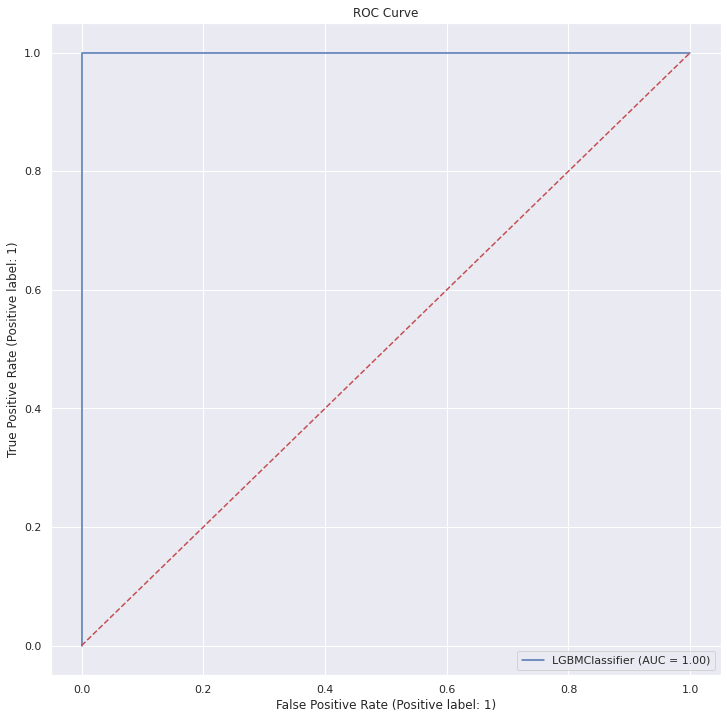

In [169]:
plot_roc_curve(lgbm_model, X, y)
plt.title("ROC Curve")
plt.plot([0, 1], [0, 1], "r--")
plt.show();

ROC AUC

In [170]:
y_prob = lgbm_model.predict_proba(X)[:,1]

In [171]:
y_prob[:5]

array([9.61825472e-01, 4.14174771e-03, 9.56568647e-01, 1.88904442e-04,
       9.64783178e-01])

In [172]:
roc_auc_score(y, y_prob)

1.0

##### **XGBoost**

**Model**

In [173]:
xgb_model = XGBClassifier(random_state=42)

In [174]:
xgb_model = xgb_model.fit(X, y)

**Tahmin**

In [175]:
y_pred = xgb_model.predict(X)

In [176]:
y_pred[0:5]

array([1, 0, 1, 0, 1])

**Başarı Değerlendirme**

**Classification Report**

In [177]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.93      0.91       500
           1       0.86      0.80      0.83       268

    accuracy                           0.89       768
   macro avg       0.88      0.87      0.87       768
weighted avg       0.88      0.89      0.88       768



**Accuracy Score**

In [178]:
accuracy_score(y, y_pred)

0.8854166666666666

**Reccal Score**

In [179]:
recall_score(y, y_pred, average=None)

array([0.932     , 0.79850746])

**Precision Score**

In [180]:
precision_score(y, y_pred, average=None)

array([0.89615385, 0.86290323])

**F-1 Score**

In [181]:
f1_score(y, y_pred, average=None)

array([0.91372549, 0.82945736])

**ROC CURVE**

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


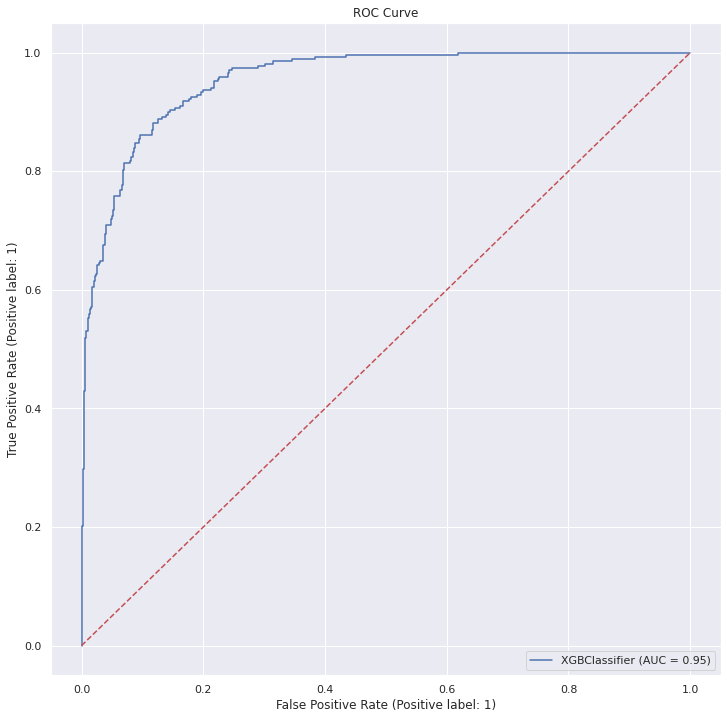

In [182]:
plot_roc_curve(xgb_model, X, y)
plt.title("ROC Curve")
plt.plot([0, 1], [0, 1], "r--")
plt.show();

ROC AUC

In [183]:
y_prob = xgb_model.predict_proba(X)[:,1]

In [184]:
y_prob[:5]

array([0.74622154, 0.04798231, 0.8731491 , 0.0092444 , 0.8839869 ],
      dtype=float32)

In [185]:
roc_auc_score(y, y_prob)

0.9540074626865671

#### **Holdout Yöntemi İle Model Doğrulama**

In [186]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=17)

* Eğitim setiyle model kuracağız test setiyle modelin başarısını ölçeceğiz.

In [187]:
X_train.head()

,PREGNANCIES,GLUCOSE,BLOODPRESSURE,SKINTHICKNESS,INSULIN,BMI,DIABETESPEDIGREEFUNCTION,AGE,NEW_PREGNANCIES_AGE,NEW_AGE_CAT_senior,NEW_AGE_CAT_young,NEW_BMI_Healthy Weight,NEW_BMI_Overweight,NEW_BMI_Second Degree Obese,NEW_BMI_Third Degree Obese,NEW_BMI_Weak
600,-0.849,-0.421,1.220,-1.105,-0.171,-0.713,-0.206,-0.792,-0.785,0,1,0,1,0,0,0
248,1.545,0.092,-0.048,0.513,3.033,0.465,-0.620,0.069,0.989,0,0,0,0,1,0,0
582,2.442,-0.004,0.516,-1.336,-0.171,-0.798,-0.700,2.478,3.744,1,0,0,1,0,0,0
274,2.742,-0.486,-0.048,-0.153,-0.171,0.295,-0.728,1.618,3.316,0,0,0,0,0,0,0
518,2.742,-1.448,-0.753,-0.153,-0.171,0.096,-0.977,0.671,2.417,0,0,0,0,0,0,0


In [188]:
X_test.head()

,PREGNANCIES,GLUCOSE,BLOODPRESSURE,SKINTHICKNESS,INSULIN,BMI,DIABETESPEDIGREEFUNCTION,AGE,NEW_PREGNANCIES_AGE,NEW_AGE_CAT_senior,NEW_AGE_CAT_young,NEW_BMI_Healthy Weight,NEW_BMI_Overweight,NEW_BMI_Second Degree Obese,NEW_BMI_Third Degree Obese,NEW_BMI_Weak
649,-1.148,-0.454,-0.753,-0.411,-0.171,-0.813,-1.142,-0.878,-0.936,0,1,0,1,0,0,0
516,1.545,0.766,1.220,0.628,0.515,-0.259,1.093,1.704,2.065,0,0,0,0,0,0,0
151,0.049,-0.229,-0.401,-0.153,-0.171,-1.451,-0.094,0.327,-0.005,0,0,1,0,0,0,0
381,-1.148,-0.518,-0.189,-0.758,-0.171,-1.721,-0.781,-0.964,-0.936,0,1,1,0,0,0,0
325,-0.849,1.151,0.093,-0.874,0.564,-0.926,-1.177,-0.792,-0.785,0,1,0,1,0,0,0


In [189]:
y_train[:5]

600    0
248    0
582    0
274    0
518    0
Name: OUTCOME, dtype: int64

In [190]:
y_test[:5]

649    0
516    1
151    0
381    0
325    0
Name: OUTCOME, dtype: int64

##### **Logistic Regresyon**

**Model**

In [191]:
log_model = LogisticRegression(random_state=42)

In [192]:
log_model = log_model.fit(X_train, y_train)

**Tahmin**

In [193]:
y_pred = log_model.predict(X_test)

In [194]:
y_pred[0:5]

array([0, 1, 0, 0, 0])

**Başarı Değerlendirme**

**Classification Report**

In [195]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       150
           1       0.73      0.59      0.65        81

    accuracy                           0.78       231
   macro avg       0.76      0.74      0.75       231
weighted avg       0.77      0.78      0.77       231



**Accuracy Score**

In [196]:
accuracy_score(y_pred, y_test)

0.7792207792207793

**Reccal Score**

In [197]:
recall_score(y_pred, y_test, average=None)

array([0.8       , 0.72727273])

**Precision Score**

In [198]:
precision_score(y_pred, y_test, average=None)

array([0.88      , 0.59259259])

**F-1 Score**

In [199]:
f1_score(y_pred, y_test, average=None)

array([0.83809524, 0.65306122])

**ROC CURVE**

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


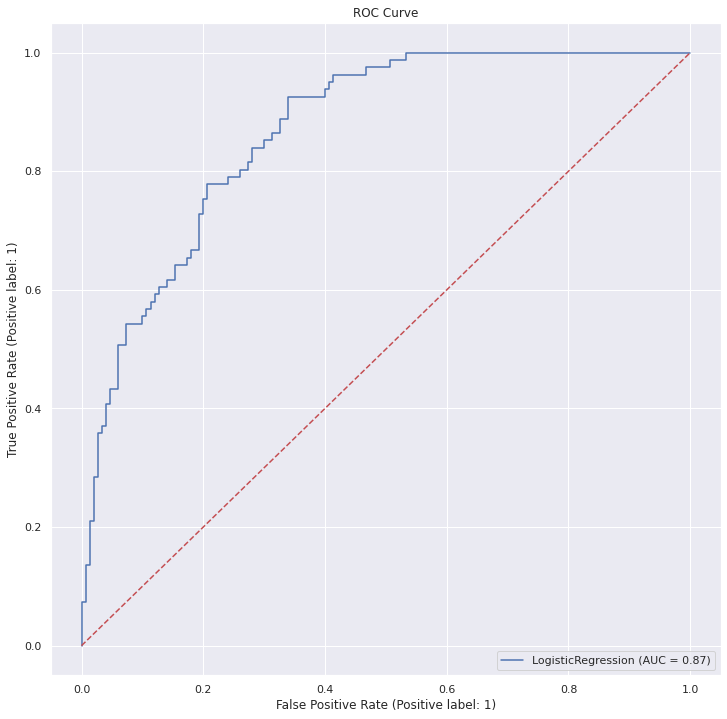

In [200]:
plot_roc_curve(log_model, X_test, y_test)
plt.title("ROC Curve")
plt.plot([0, 1], [0, 1], "r--")
plt.show();

ROC AUC

In [201]:
y_prob = log_model.predict_proba(X_test)[:,1]

In [202]:
y_prob[:5]

array([0.04615372, 0.81525088, 0.11565911, 0.01404074, 0.20165158])

In [203]:
roc_auc_score(y_test, y_prob)

0.8677366255144032

##### **KNN**

**Model**

In [204]:
knn_model = KNeighborsClassifier()

In [205]:
knn_model = knn_model.fit(X_train, y_train)

**Tahmin**

In [206]:
y_pred = knn_model.predict(X_test)

In [207]:
y_pred[0:5]

array([0, 1, 0, 0, 0])

**Başarı Değerlendirme**

**Classification Report**

In [208]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83       150
           1       0.70      0.59      0.64        81

    accuracy                           0.77       231
   macro avg       0.75      0.73      0.73       231
weighted avg       0.76      0.77      0.76       231



**Accuracy Score**

In [209]:
accuracy_score(y_test, y_pred)

0.7662337662337663

**Reccal Score**

In [210]:
recall_score(y_test, y_pred, average=None)

array([0.86      , 0.59259259])

**Precision Score**

In [211]:
precision_score(y_test, y_pred, average=None)

array([0.7962963 , 0.69565217])

**F-1 Score**

In [212]:
f1_score(y_test, y_pred, average=None)

array([0.82692308, 0.64      ])

**ROC CURVE**

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


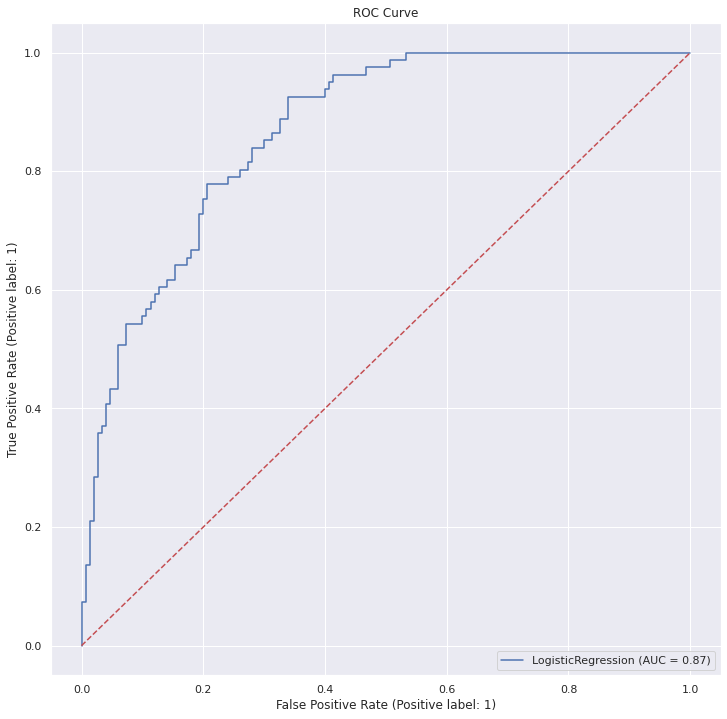

In [213]:
plot_roc_curve(log_model, X_test, y_test)
plt.title("ROC Curve")
plt.plot([0, 1], [0, 1], "r--")
plt.show();

ROC AUC

In [214]:
y_prob = log_model.predict_proba(X_test)[:,1]

In [215]:
y_prob[:5]

array([0.04615372, 0.81525088, 0.11565911, 0.01404074, 0.20165158])

In [216]:
roc_auc_score(y_test, y_prob)

0.8677366255144032

##### **Random Forest**

**Model**

In [217]:
rf_model = RandomForestClassifier(random_state=42)

In [218]:
rf_model = rf_model.fit(X_train, y_train)

**Tahmin**

In [219]:
y_pred = rf_model.predict(X_test)

In [220]:
y_pred[0:5]

array([0, 1, 0, 0, 0])

**Başarı Değerlendirme**

**Classification Report**

In [221]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       150
           1       0.72      0.63      0.67        81

    accuracy                           0.78       231
   macro avg       0.77      0.75      0.75       231
weighted avg       0.78      0.78      0.78       231



**Accuracy Score**

In [222]:
accuracy_score(y_test, y_pred)

0.7835497835497836

**Reccal Score**

In [223]:
recall_score(y_test, y_pred, average=None)

array([0.86666667, 0.62962963])

**Precision Score**

In [224]:
precision_score(y_test, y_pred, average=None)

array([0.8125    , 0.71830986])

**F-1 Score**

In [225]:
f1_score(y_test, y_pred, average=None)

array([0.83870968, 0.67105263])

**ROC CURVE**

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


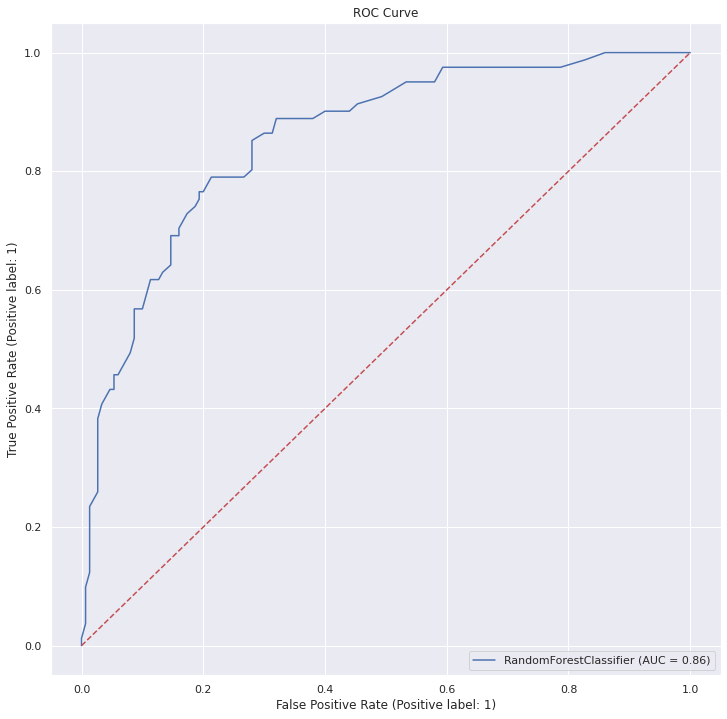

In [226]:
plot_roc_curve(rf_model, X_test, y_test)
plt.title("ROC Curve")
plt.plot([0, 1], [0, 1], "r--")
plt.show();

ROC AUC

In [227]:
y_prob = rf_model.predict_proba(X_test)[:,1]

In [228]:
y_prob[:5]

array([0.08, 0.93, 0.11, 0.02, 0.31])

In [229]:
roc_auc_score(y_test, y_prob)

0.8557201646090535

##### **SVC**

**Model**

In [230]:
svc_model = SVC(random_state=42)

In [231]:
svc_model = svc_model.fit(X_train, y_train)

**Tahmin**

In [232]:
y_pred = svc_model.predict(X_test)

In [233]:
y_pred[0:5]

array([0, 1, 0, 0, 0])

**Başarı Değerlendirme**

**Classification Report**

In [234]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.89      0.84       150
           1       0.74      0.56      0.63        81

    accuracy                           0.77       231
   macro avg       0.76      0.72      0.74       231
weighted avg       0.77      0.77      0.77       231



**Accuracy Score**

In [235]:
accuracy_score(y_test, y_pred)

0.7748917748917749

**Reccal Score**

In [236]:
recall_score(y_test, y_pred, average=None)

array([0.89333333, 0.55555556])

**Precision Score**

In [237]:
precision_score(y_test, y_pred, average=None)

array([0.78823529, 0.73770492])

**F-1 Score**

In [238]:
f1_score(y_test, y_pred, average=None)

array([0.8375    , 0.63380282])

**ROC CURVE**

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


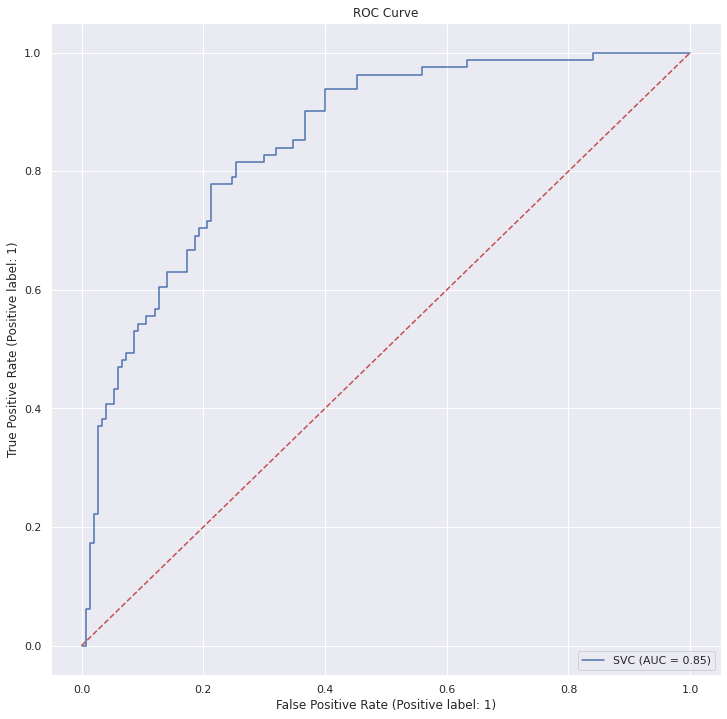

In [239]:
plot_roc_curve(svc_model, X_test, y_test)
plt.title("ROC Curve")
plt.plot([0, 1], [0, 1], "r--")
plt.show();

##### **Decision Tree**

**Model**

In [240]:
dt_model = DecisionTreeClassifier(random_state=42)

In [241]:
dt_model = dt_model.fit(X_train, y_train)

**Tahmin**

In [242]:
y_pred = dt_model.predict(X_test)

In [243]:
y_pred[0:5]

array([0, 1, 0, 0, 0])

**Başarı Değerlendirme**

**Classification Report**

In [244]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.77      0.78       150
           1       0.59      0.62      0.60        81

    accuracy                           0.71       231
   macro avg       0.69      0.69      0.69       231
weighted avg       0.72      0.71      0.72       231



**Accuracy Score**

In [245]:
accuracy_score(y_test, y_pred)

0.7142857142857143

**Reccal Score**

In [246]:
recall_score(y_test, y_pred, average=None)

array([0.76666667, 0.61728395])

**Precision Score**

In [247]:
precision_score(y_test, y_pred, average=None)

array([0.78767123, 0.58823529])

**F-1 Score**

In [248]:
f1_score(y_test, y_pred, average=None)

array([0.77702703, 0.60240964])

**ROC CURVE**

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


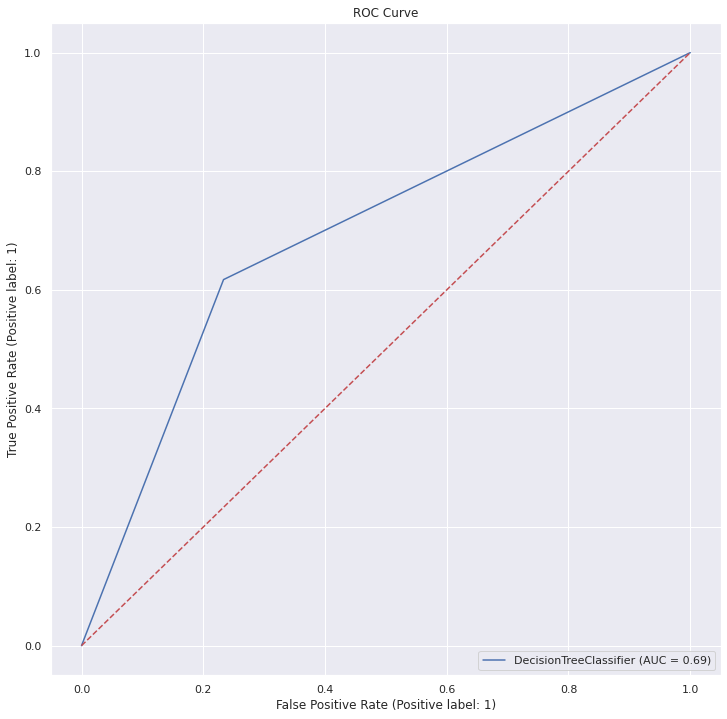

In [249]:
plot_roc_curve(dt_model, X_test, y_test)
plt.title("ROC Curve")
plt.plot([0, 1], [0, 1], "r--")
plt.show();

ROC AUC

In [250]:
y_prob = dt_model.predict_proba(X_test)[:,1]

In [251]:
y_prob[:5]

array([0., 1., 0., 0., 0.])

In [252]:
roc_auc_score(y_test, y_prob)

0.6919753086419752

##### **GBM**

**Model**

In [253]:
gbm_model = GradientBoostingClassifier(random_state=42)

In [254]:
gbm_model = gbm_model.fit(X_train, y_train)

**Tahmin**

In [255]:
y_pred = gbm_model.predict(X_test)

In [256]:
y_pred[0:5]

array([0, 1, 0, 0, 0])

**Başarı Değerlendirme**

**Classification Report**

In [257]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84       150
           1       0.71      0.68      0.70        81

    accuracy                           0.79       231
   macro avg       0.77      0.77      0.77       231
weighted avg       0.79      0.79      0.79       231



**Accuracy Score**

In [258]:
accuracy_score(y_test, y_pred)

0.7922077922077922

**Reccal Score**

In [259]:
recall_score(y_test, y_pred, average=None)

array([0.85333333, 0.67901235])

**Precision Score**

In [260]:
precision_score(y_test, y_pred, average=None)

array([0.83116883, 0.71428571])

**F-1 Score**

In [261]:
f1_score(y_test, y_pred, average=None)

array([0.84210526, 0.69620253])

**ROC CURVE**

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


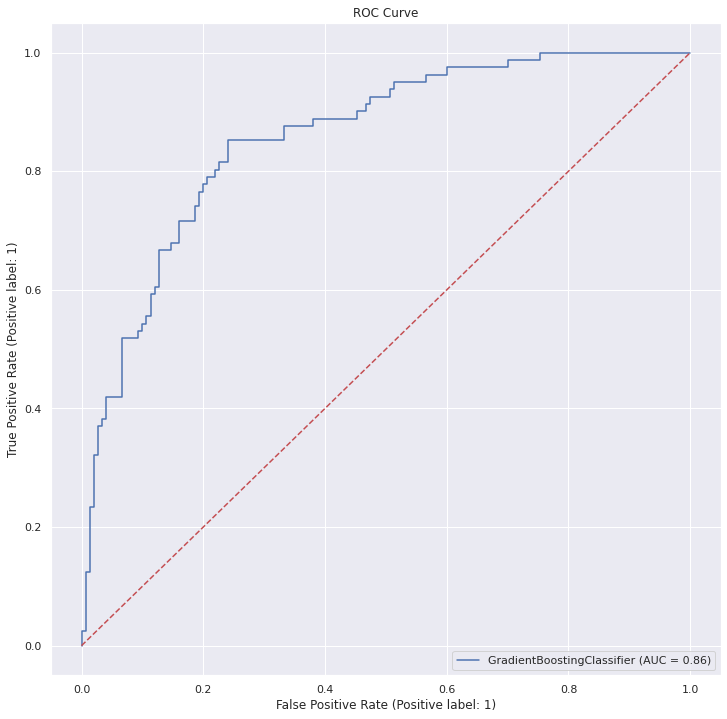

In [262]:
plot_roc_curve(gbm_model, X_test, y_test)
plt.title("ROC Curve")
plt.plot([0, 1], [0, 1], "r--")
plt.show();

ROC AUC

In [263]:
y_prob = gbm_model.predict_proba(X_test)[:,1]

In [264]:
y_prob[:5]

array([0.04306115, 0.88556432, 0.04755779, 0.02108254, 0.24690314])

In [265]:
roc_auc_score(y_test, y_prob)

0.8575308641975309

##### **LightGBM**

Model

In [266]:
lgbm_model = lgb.LGBMClassifier()

In [267]:
lgbm_model = lgbm_model.fit(X_train,y_train)

**Tahmin**

In [268]:
y_pred = lgbm_model.predict(X_test)

In [269]:
y_pred[0:5]

array([0, 1, 0, 0, 0])

**Başarı Değerlendirme**

**Classification Report**

In [270]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.87      0.83       150
           1       0.71      0.59      0.64        81

    accuracy                           0.77       231
   macro avg       0.75      0.73      0.74       231
weighted avg       0.77      0.77      0.77       231



**Accuracy Score**

In [271]:
accuracy_score(y_test, y_pred)

0.7705627705627706

**Reccal Score**

In [272]:
recall_score(y_test, y_pred, average=None)

array([0.86666667, 0.59259259])

**Precision Score**

In [273]:
precision_score(y_test, y_pred, average=None)

array([0.79754601, 0.70588235])

**F-1 Score**

In [274]:
f1_score(y_test, y_pred, average=None)

array([0.83067093, 0.6442953 ])

**ROC CURVE**

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


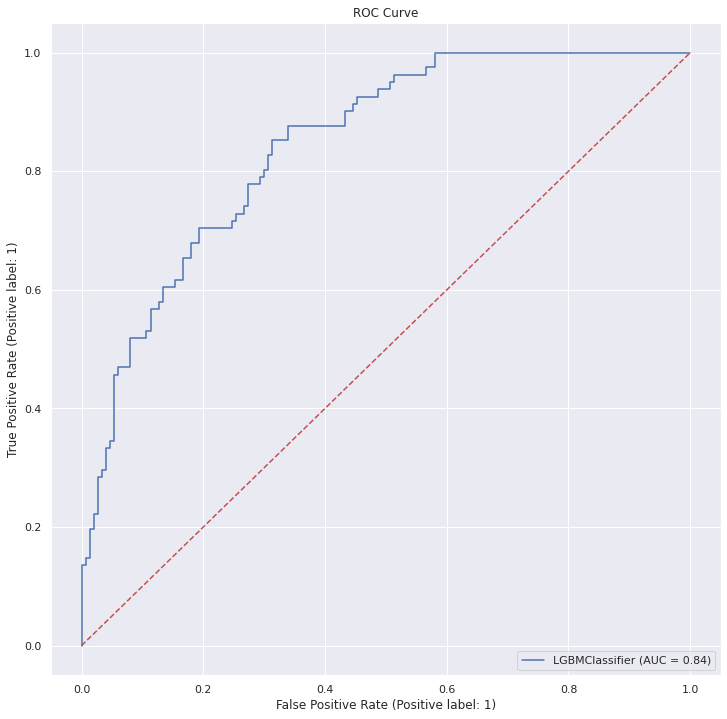

In [275]:
plot_roc_curve(lgbm_model, X_test, y_test)
plt.title("ROC Curve")
plt.plot([0, 1], [0, 1], "r--")
plt.show();

ROC AUC

In [276]:
y_prob = lgbm_model.predict_proba(X_test)[:,1]

In [277]:
y_prob[:5]

array([8.61154630e-04, 9.92106455e-01, 5.05442217e-03, 4.57314117e-04,
       3.17862792e-02])

In [278]:
roc_auc_score(y_test, y_prob)

0.8440329218106996

##### **XGBoost**

**Model**

In [279]:
xgb_model = XGBClassifier(random_state=42)

In [280]:
xgb_model = xgb_model.fit(X_train, y_train)

**Tahmin**

In [281]:
y_pred = xgb_model.predict(X_test)

In [282]:
y_pred[0:5]

array([0, 1, 0, 0, 0])

**Başarı Değerlendirme**

**Classification Report**

In [283]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.83      0.82       150
           1       0.68      0.64      0.66        81

    accuracy                           0.77       231
   macro avg       0.74      0.74      0.74       231
weighted avg       0.76      0.77      0.76       231



**Accuracy Score**

In [284]:
accuracy_score(y_test, y_pred)

0.7662337662337663

**Reccal Score**

In [285]:
recall_score(y_test, y_pred, average=None)

array([0.83333333, 0.64197531])

**Precision Score**

In [286]:
precision_score(y_test, y_pred, average=None)

array([0.81168831, 0.67532468])

**F-1 Score**

In [287]:
f1_score(y_test, y_pred, average=None)

array([0.82236842, 0.65822785])

**ROC CURVE**

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


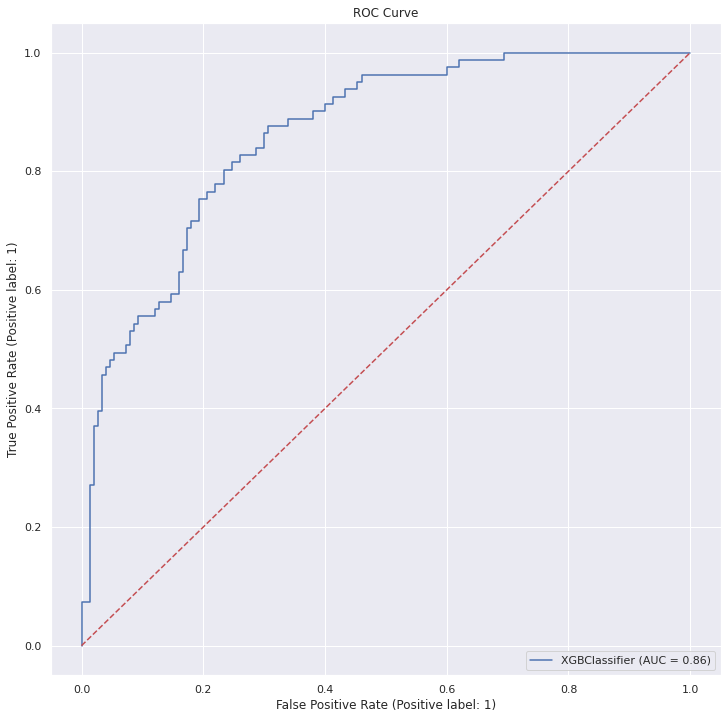

In [288]:
plot_roc_curve(xgb_model, X_test, y_test)
plt.title("ROC Curve")
plt.plot([0, 1], [0, 1], "r--")
plt.show();

ROC AUC

In [289]:
y_prob = xgb_model.predict_proba(X_test)[:,1]

In [290]:
y_prob[:5]

array([0.0135784 , 0.8636501 , 0.04185656, 0.02491302, 0.1966982 ],
      dtype=float32)

In [291]:
roc_auc_score(y_test, y_prob)

0.8618930041152263

#### **K Fold Cross Validation Yöntemi İle Model Doğrulama**

##### **Logistic Regresyon**

Model

In [292]:
log_model = LogisticRegression().fit(X,y)

Model Doğrulama

In [293]:
cv_results = cross_validate(log_model,
                           X, y,
                           cv=5,
                           scoring=["accuracy", "precision", "recall", "f1", "roc_auc"])

**Accuracy Sonucu:**

In [294]:
cv_results["test_accuracy"].mean()

0.7747899159663865

**Precision Sonucu:**

In [295]:
cv_results["test_precision"].mean()

0.7266304909560724

**Recall Sonucu:**

In [296]:
cv_results["test_recall"].mean()

0.5786862334032146

**F-1 Score Sonucu:**

In [297]:
cv_results["test_f1"].mean()

0.6413127136604867

**AUC Sonucu:**

In [298]:
cv_results["test_roc_auc"].mean()

0.8487868623340322

##### **KNN**

Model

In [299]:
knn_model = KNeighborsClassifier()

Model Doğrulama

In [300]:
cv_results = cross_validate(knn_model,
                           X, y,
                           cv=5,
                           scoring=["accuracy", "precision", "recall", "f1", "roc_auc"])

**Accuracy Sonucu:**

In [301]:
cv_results["test_accuracy"].mean()

0.7513793396146337

**Precision Sonucu:**

In [302]:
cv_results["test_precision"].mean()

0.6594599395313681

**Recall Sonucu:**

In [303]:
cv_results["test_recall"].mean()

0.5971348707197764

**F-1 Score Sonucu:**

In [304]:
cv_results["test_f1"].mean()

0.6258592433824631

**AUC Sonucu:**

In [305]:
cv_results["test_roc_auc"].mean()

0.8009678546471001

##### **Random Forest**

Model

In [306]:
rf_model = RandomForestClassifier(random_state=42)

Model Doğrulama

In [307]:
cv_results = cross_validate(rf_model,
                           X, y,
                           cv=5,
                           scoring=["accuracy", "precision", "recall", "f1", "roc_auc"])

**Accuracy Sonucu:**

In [308]:
cv_results["test_accuracy"].mean()

0.7643833290892115

**Precision Sonucu:**

In [309]:
cv_results["test_precision"].mean()

0.6948021949948886

**Recall Sonucu:**

In [310]:
cv_results["test_recall"].mean()

0.5935010482180294

**F-1 Score Sonucu:**

In [311]:
cv_results["test_f1"].mean()

0.6368149351165965

**AUC Sonucu:**

In [312]:
cv_results["test_roc_auc"].mean()

0.8288752620545073

##### **SVC**

Model

In [313]:
svc_model = SVC(random_state=42)

Model Doğrulama

In [314]:
cv_results = cross_validate(svc_model,
                           X, y,
                           cv=5,
                           scoring=["accuracy", "precision", "recall", "f1", "roc_auc"])

**Accuracy Sonucu:**

In [315]:
cv_results["test_accuracy"].mean()

0.7656820303879128

**Precision Sonucu:**

In [316]:
cv_results["test_precision"].mean()

0.7083727468190605

**Recall Sonucu:**

In [317]:
cv_results["test_recall"].mean()

0.5634521313766596

**F-1 Score Sonucu:**

In [318]:
cv_results["test_f1"].mean()

0.6251024002881829

**AUC Sonucu:**

In [319]:
cv_results["test_roc_auc"].mean()

0.8390593990216633

##### **Decision Tree**

Model

In [320]:
dt_model = DecisionTreeClassifier(random_state=42)

Model Doğrulama

In [321]:
cv_results = cross_validate(dt_model,
                           X, y,
                           cv=5,
                           scoring=["accuracy", "precision", "recall", "f1", "roc_auc"])

**Accuracy Sonucu:**

In [322]:
cv_results["test_accuracy"].mean()

0.7123334182157712

**Precision Sonucu:**

In [323]:
cv_results["test_precision"].mean()

0.5934987170452286

**Recall Sonucu:**

In [324]:
cv_results["test_recall"].mean()

0.6080363382250175

**F-1 Score Sonucu:**

In [325]:
cv_results["test_f1"].mean()

0.5974704062415926

**AUC Sonucu:**

In [326]:
cv_results["test_roc_auc"].mean()

0.6880181691125087

##### **GBM**

Model

In [327]:
gbm_model = GradientBoostingClassifier(random_state=42)

Model Doğrulama

In [328]:
cv_results = cross_validate(gbm_model,
                           X, y,
                           cv=5,
                           scoring=["accuracy", "precision", "recall", "f1", "roc_auc"])

**Accuracy Sonucu:**

In [329]:
cv_results["test_accuracy"].mean()

0.7656565656565657

**Precision Sonucu:**

In [330]:
cv_results["test_precision"].mean()

0.6843105448011109

**Recall Sonucu:**

In [331]:
cv_results["test_recall"].mean()

0.6120195667365479

**F-1 Score Sonucu:**

In [332]:
cv_results["test_f1"].mean()

0.6449035625164562

**AUC Sonucu:**

In [333]:
cv_results["test_roc_auc"].mean()

0.8268525506638715

##### **LightGBM**

Model

In [334]:
lgbm_model = lgb.LGBMClassifier()

Model Doğrulama

In [335]:
cv_results = cross_validate(lgbm_model,
                           X, y,
                           cv=5,
                           scoring=["accuracy", "precision", "recall", "f1", "roc_auc"])

**Accuracy Sonucu:**

In [336]:
cv_results["test_accuracy"].mean()

0.7643663526016468

**Precision Sonucu:**

In [337]:
cv_results["test_precision"].mean()

0.6821212862389332

**Recall Sonucu:**

In [338]:
cv_results["test_recall"].mean()

0.6083857442348009

**F-1 Score Sonucu:**

In [339]:
cv_results["test_f1"].mean()

0.6400947058452202

**AUC Sonucu:**

In [340]:
cv_results["test_roc_auc"].mean()

0.8099007686932215

##### **XGBoost**

Model

In [341]:
xgb_model = XGBClassifier(random_state=42)

Model Doğrulama

In [342]:
cv_results = cross_validate(xgb_model,
                           X, y,
                           cv=5,
                           scoring=["accuracy", "precision", "recall", "f1", "roc_auc"])

**Accuracy Sonucu:**

In [343]:
cv_results["test_accuracy"].mean()

0.7799847211611917

**Precision Sonucu:**

In [344]:
cv_results["test_precision"].mean()

0.7051744954945696

**Recall Sonucu:**

In [345]:
cv_results["test_recall"].mean()

0.6380852550663871

**F-1 Score Sonucu:**

In [346]:
cv_results["test_f1"].mean()

0.6694245014245014

**AUC Sonucu:**

In [347]:
cv_results["test_roc_auc"].mean()

0.8249622641509434

### **Sonuçları Değerlendirme**

* Fakat elimizdeki veri dengeli bir veri değil.
* Accuracy değerine bakıp bir şeyleri göz önünde bulunduruyoruz fakat bununla beraber f1 score değerine de bakmak bizim için önemli.

**Model Doğrulama Yapmadan Modeli Eğitme ve Test Etme**

**1.Lojistik Regresyon**

**Model Doğrulama Yapmadan Modeli Eğitme ve Test Etme**

**Accuracy Score: 0.78**

**F-1 Score: 0.66**

**Holdout Yöntemi İle Model Doğrulama**

**Accuracy Score: 0.78**

**F-1 Score: 0.65**

**K Fold Cross Validation Yöntemi İle Model Doğrulama**

**Accuracy Score: 0.77**

**F-1 Score: 0.64**

**2.KNN**

**Model Doğrulama Yapmadan Modeli Eğitme ve Test Etme**

**Accuracy Score: 0.84**

**F-1 Score: 0.76**

**Holdout Yöntemi İle Model Doğrulama**

**Accuracy Score: 0.77**

**F-1 Score: 0.64**

**K Fold Cross Validation Yöntemi İle Model Doğrulama**

**Accuracy Score: 0.75**

**F-1 Score: 0.62**

**3.Random Forest**

**Model Doğrulama Yapmadan Modeli Eğitme ve Test Etme**

**Accuracy Score: 1.0**

**F-1 Score: 1.0**

**Holdout Yöntemi İle Model Doğrulama**

**Accuracy Score: 0.78**

**F-1 Score: 0.67**

**K Fold Cross Validation Yöntemi İle Model Doğrulama**

**Accuracy Score: 0.76**

**F-1 Score: 0.63**

**4.SVC**

**Model Doğrulama Yapmadan Modeli Eğitme ve Test Etme**

**Accuracy Score: 0.83**

**F-1 Score: 0.74**

**Holdout Yöntemi İle Model Doğrulama**

**Accuracy Score: 0.77**

**F-1 Score: 0.63**

**K Fold Cross Validation Yöntemi İle Model Doğrulama**

**Accuracy Score: 0.76**

**F-1 Score: 0.62**

**5.Decision Tree**

**Model Doğrulama Yapmadan Modeli Eğitme ve Test Etme**

**Accuracy Score: 1.00**

**F-1 Score: 1.00**

**Holdout Yöntemi İle Model Doğrulama**

**Accuracy Score: 0.71**

**F-1 Score: 0.60**

**K Fold Cross Validation Yöntemi İle Model Doğrulama**

**Accuracy Score: 0.71**

**F-1 Score: 0.59**

**6.GBM**

**Model Doğrulama Yapmadan Modeli Eğitme ve Test Etme**

**Accuracy Score: 0.92**

**F-1 Score: 0.88**

**Holdout Yöntemi İle Model Doğrulama**

**Accuracy Score: 0.79**

**F-1 Score: 0.70**

**K Fold Cross Validation Yöntemi İle Model Doğrulama**

**Accuracy Score: 0.76**

**F-1 Score: 0.64**

**7.LightGBM**

**Model Doğrulama Yapmadan Modeli Eğitme ve Test Etme**

**Accuracy Score: 1.00**

**F-1 Score: 1.00**

**Holdout Yöntemi İle Model Doğrulama**

**Accuracy Score: 0.77**

**F-1 Score: 0.64**

**K Fold Cross Validation Yöntemi İle Model Doğrulama**

**Accuracy Score: 0.76**

**F-1 Score: 0.64**

**8.XGBoost**

**Model Doğrulama Yapmadan Modeli Eğitme ve Test Etme**

**Accuracy Score: 0.89**

**F-1 Score: 0.83**

**Holdout Yöntemi İle Model Doğrulama**

**Accuracy Score: 0.77**

**F-1 Score: 0.66**

**K Fold Cross Validation Yöntemi İle Model Doğrulama**

**Accuracy Score: 0.77**

**F-1 Score: 0.66**

* Bizim için anlamlı olabilecekler arasında Holdout Yöntemi ve K-Fold Cross Validation yöntemidir. 
* K-Fold yöntemine göre sonuçları değerlendirecek olursak X-Gboost algoritması bizim için en iyi sonucu vermiştir.